# Netflix - Data Exploration and Visualisation

### This Kaggle Netflix Dataset has information about the TV shows and Movies available on Netflix from the year 2008 to 2021.

#### Contributors : Mr.Sunil Zakane , Ms.Satindra Kathania (Suman) , Ms. Nitha Kumar

### Study Objectives:
* What different types of show or movie are uploaded on Netflix?
* Which has the highest rating Tv show or Movies?
* Distribution of Ratings ?
* Released movies and TV shows over the years?
* Content added on Yearly, monthly and Day basis?
* Content added by genres?
* Most popular genres?
* Which Actors, directors, countries produces more contents?
* Which Actors, directors, countries produces more contents in different genres?
* What type of content more famous in top countries?
* Top actors, directors, genres by countries?
* Most famous TV shows, Movies by top countries?

    

### Importing libraries

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Read the Data

In [3]:
df = pd.read_csv("netflix.csv")

In [4]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [5]:
df.shape

(8807, 12)

### Checking duplicate entries

In [6]:
df.duplicated().sum()   #checking total duplicated values

0

In [7]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


 No duplicate found



### Checking missing data in columns 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


From above it is apparent that some columns have null values.Checking missing values per column in %:


In [15]:
#missing values per column in %
missing_pct=(df.isna().sum()/len(df))*100 # % 
missing_count=df.isnull().sum()# total missing values in the data set
Total_missing = pd.concat([missing_count,missing_pct],axis=1,keys=['Missing_Count','Missing%'])
Total_missing

,Missing_Count,Missing%
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


Mainly Director column has 29% missing value, cast and country have ~10% missing data

In [11]:
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


##### replacing necessary null values 


In [16]:
df["director"].fillna(value="Unknown", inplace=True)
df["cast"].fillna(value="Unknown", inplace=True)
df["country"].fillna(value="Unknown",inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##### unique values per column: 

In [18]:
df.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

##### # converting data type of date_added to datetime format


In [23]:

df["date_added"] = pd.to_datetime(df["date_added"])

In [15]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


###### dropping unnecessary columns 

In [20]:
df.drop(["show_id","description"], axis=1 , inplace= True)

##### extracting necessary freatures from already present data : 
##### adding year , month and day data when content was added 

In [24]:
df["year_added"]  = df["date_added"].dt.strftime("%Y")

In [25]:
df["month_added"]  = df["date_added"].dt.strftime("%b")

In [26]:
df["day_added"]  = df["date_added"].dt.strftime("%a")

In [21]:
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


#### seperating duration for TV shows and Movies and changing their data types 


In [14]:
df["Movie_duration"] = df["duration"].loc[df["type"]=="Movie"]
df["Series_duration"] = df["duration"].loc[df["type"]=="TV Show"]

In [15]:
### changing data type and format of Movies_duration to float
def split_duration(x):
    return str(x).split(" ")[0]


In [16]:
# casting object to float
df["Movie_duration"] = df["Movie_duration"].apply(split_duration).astype("float")
df["Series_duration"] = df["Series_duration"].apply(split_duration).astype("float")

In [17]:
df.drop("duration",axis =1,inplace=True)

In [51]:
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,year_added,month_added,day_added,Movie_duration,Series_duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,2021,Sep,Sat,90.0,NaN
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021,Sep,Fri,NaN,2.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021,Sep,Fri,NaN,1.0


### `type of content on Netflix dataset`

In [27]:
t1=df["type"].value_counts()

In [28]:
t2 = df["type"].value_counts(normalize=True)*100
content_type=pd.concat([t1,t2],axis=1,keys=["Counts", "Count%"])
content_type

,Counts,Count%
Movie,6131,69.615079
TV Show,2676,30.384921


In [29]:
def show_values_on_bars(axs, h_v="v", space=1):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center",fontsize=18) 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left",fontsize=18)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [40]:
sns.set(font_scale = 1)
sns.set_theme()

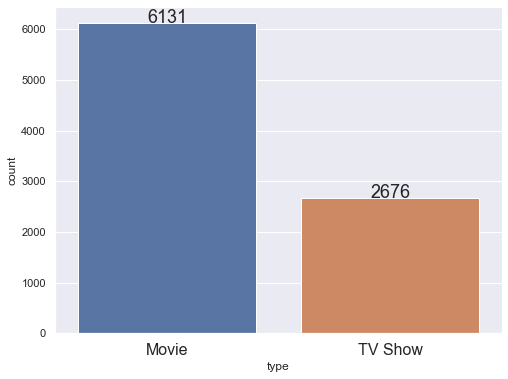

In [41]:
plt.figure(figsize=(8,6))
types = sns.countplot(data = df , x = "type")    
show_values_on_bars(types,h_v="v",space=1) 
plt.xticks(fontsize=16)
plt.savefig("ContentTypes.png")

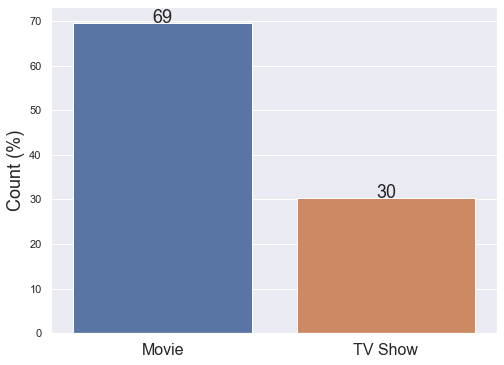

In [42]:
plt.figure(figsize=(8,6))

show_values_on_bars(sns.barplot(x = df["type"].value_counts().index,
                                y = (df["type"].value_counts(normalize=True)*100))
                    ,h_v="v")
#plt.xlabel("Content Type",fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel("Count (%)",fontsize=18)
plt.savefig("ContentTypes%.png")

### `Number of content per Rating`

##### number of Content each rating category has : 

In [34]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [34]:
(df["rating"].value_counts(normalize=True)*100).head(11)

TV-MA    36.430762
TV-14    24.537090
TV-PG     9.803476
R         9.076451
PG-13     5.566284
TV-Y7     3.794161
TV-Y      3.487447
PG        3.260252
TV-G      2.499148
NR        0.908781
G         0.465750
Name: rating, dtype: float64

In [35]:
# checking how much percent data we are not considering
(df["rating"].value_counts(normalize=True)*100).head(11).sum()


99.82960354424627

##### 99.82% of content is from above rating list ,hence we can neglect those rating types

In [38]:
ratings = df["rating"].value_counts().sort_values(ascending=False).head(11)

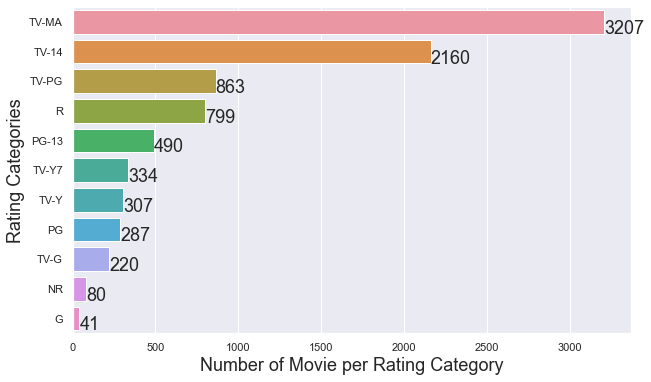

In [43]:
plt.figure(figsize=(10,6))
# sns.barplot(x=df["rating"].value_counts().head(11),y = df["rating"].value_counts().head(11).index)
show_values_on_bars(sns.barplot( x = df["rating"].value_counts().head(11),
                                y = df["rating"].value_counts().head(11).index)
                    ,h_v="h")
plt.xlabel("Number of Movie per Rating Category",fontsize=18)
plt.ylabel("Rating Categories",fontsize=18)

plt.savefig("RatingTypes.png")

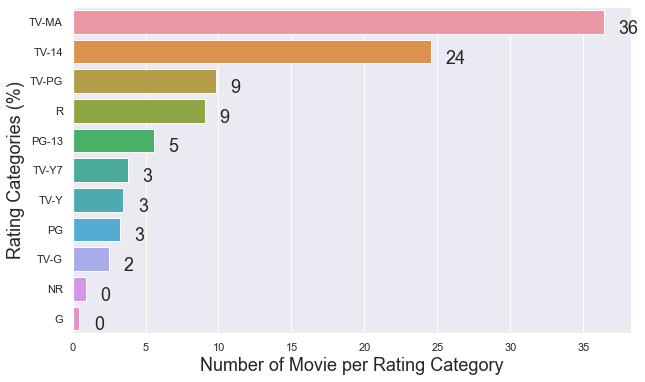

In [44]:
plt.figure(figsize=(10,6))
# sns.barplot(x=df["rating"].value_counts().head(11),y = df["rating"].value_counts().head(11).index)
show_values_on_bars(sns.barplot( x = (df["rating"].value_counts(normalize=True)*100).head(11),
                                y = df["rating"].value_counts().head(11).index)
                    ,h_v="h")
plt.xlabel("Number of Movie per Rating Category",fontsize=18)
plt.ylabel("Rating Categories (%)",fontsize=18)
plt.savefig("RatingTypes%.png")

In [45]:
plt.close()

##### Number of Contents present in data as per Age group : 

In [46]:
df["Content_For"] = df["rating"].replace({"TV-MA":"Adults",
                     "TV-14" : "Teens",
                     "TV-PG" : "Older Kids",
                      "R":"Adults",
                      "PG-13":"Teens",
                      "TV-Y7":"Older Kids",
                      "TV-Y":"Kids",
                      "PG":"Older Kids",
                      "TV-G":"All Ages",
                      "NR":"Adults",
                      "G":"All Ages",
                      "TV-Y7-FV":"Older Kids",
                      "NC-17":"Adults",
                      "UR":"Adults"
                     
                     })

In [102]:
(df["Content_For"].value_counts(normalize=True)*100).head()

Adults        46.484153
Teens         30.103374
Older Kids    16.926048
Kids           3.487447
All Ages       2.964898
Name: Content_For, dtype: float64

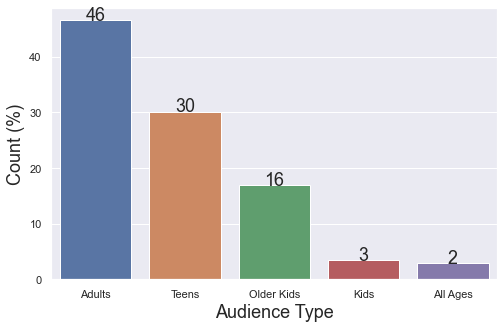

In [49]:
plt.close()
plt.figure(figsize=(8,5))

show_values_on_bars(sns.barplot(x = df["Content_For"].value_counts().head().index,
                                y = (df["Content_For"].value_counts(normalize=True)*100).head())
                    ,h_v="v")
plt.xlabel("Audience Type",fontsize=18)
plt.ylabel("Count (%)",fontsize=18)
plt.savefig("AudienceTypes%.png")

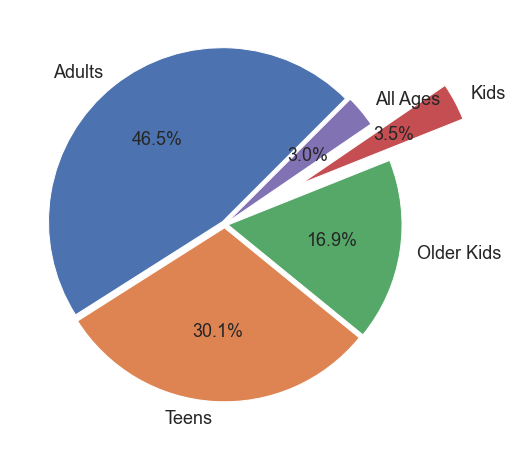

In [51]:
plt.close()
plt.figure(figsize=(8,8))
d=(df["Content_For"].value_counts(normalize=True)*100).head()
keys=df["Content_For"].value_counts().head().index
#labeling
#plt.title('Content for Audience age', fontsize=12)
colorz = ['#B5DF00','#AD1FFF', '#FFC93F','#5FB1FF','#BF1B00']
exploda = (0.02, 0.02, 0.02, 0.5, 0.02)
#plt.pie(d, labels = keys, autopct='%1.1f%%', explode=exploda, shadow=True, startangle=45,textprops={'color':"w",'fontsize': 14})
plt.pie(d, labels = keys, autopct='%1.1f%%', explode=exploda, startangle=45,textprops={'fontsize': 18})
plt.savefig("audiencePie.png")

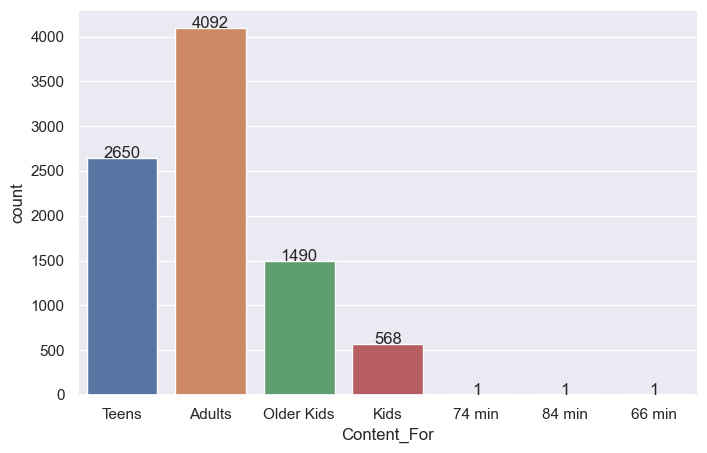

In [42]:
plt.figure(figsize=(8,5))
show_values_on_bars(sns.countplot(x = df["Content_For"]))

### number of movies released per year over last 30 years

In [52]:
in_last_30_year_movie_released =  df.groupby("release_year")["title"].count().sort_values(ascending=True).tail(30).reset_index()

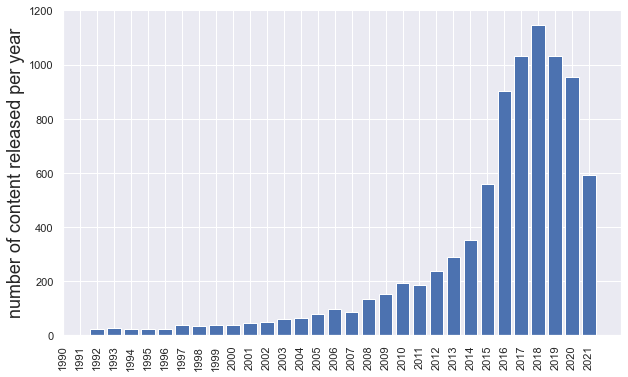

In [54]:
plt.figure(figsize=(10,6))
#sns.lineplot(x = "release_year", y = "title",
#             data = in_last_30_year_movie_released)
plt.bar(in_last_30_year_movie_released["release_year"],in_last_30_year_movie_released["title"])
plt.ylabel("number of content released per year",fontsize=18)

# plt.xticks(20)
plt.xticks(np.arange(1990,2022,1),rotation = 90)

plt.savefig("moviesByYear.png")
plt.show()

### Analysing content added on site 

### content added per year

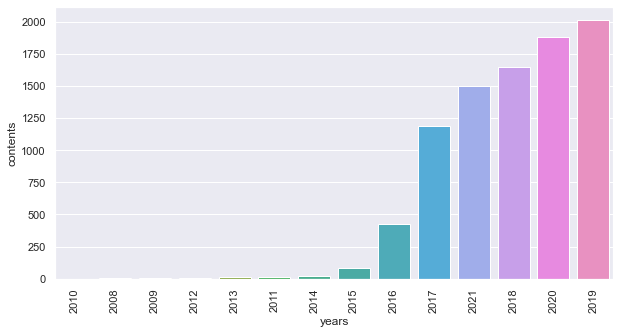

In [60]:
# content added per year

plt.figure(figsize=(10,5))
sns.barplot(y = df.groupby(df["year_added"])["title"].nunique().sort_values(ascending=True),
            x =df.groupby(df["year_added"])["title"].nunique().sort_values(ascending=True).index )
plt.xticks(rotation = 90)
plt.xlabel("years")
plt.ylabel("contents")
plt.show()


 **Most Contents were added on later Years(after 2014)**

### Content added by month

In [65]:
M_added = df.groupby("month_added")["title"].count().sort_values(ascending=True).tail(30).reset_index()
M_added

,month_added,title
0,Feb,563
1,May,632
2,Nov,705
3,Jun,728
4,Jan,738
5,Mar,742
6,Aug,755
7,Oct,760
8,Apr,764
9,Sep,770


In [66]:
# arranging months in order
def month_converter(month):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months.index(month) + 1

In [67]:
M_added["month_num"] = M_added["month_added"].map(lambda x: month_converter(x))
M_added=M_added.sort_values("month_num")

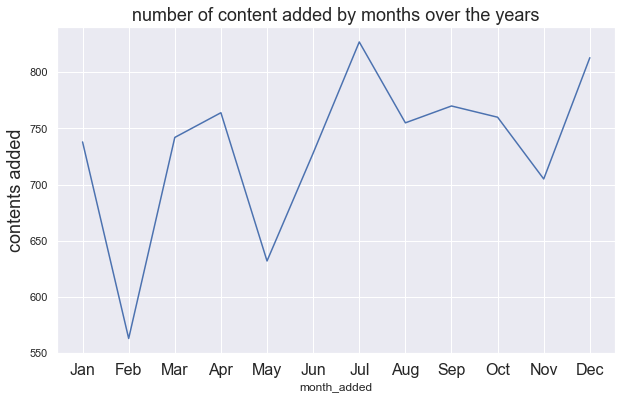

In [75]:
plt.close()
plt.figure(figsize=(10,6))
sns.lineplot(x = "month_added", y = "title", data = M_added)
#plt.bar(x = Y_added["year_added"], y = Y_added["title"])
plt.ylabel("contents added",fontsize=18)
plt.title("number of content added by months over the years",fontsize=18)
#plt.xlabel("months",fontsize=18)
#plt.show()
plt.xticks(fontsize=16)
#plt.xticks(np.arange(2007,2023,1),rotation = 90)

plt.savefig("contentByMonthadded.png")

**Most Content were added on summer vacations or winter holidays months**

### Content added by Day

In [70]:
D_added = df.groupby("day_added")["title"].count().sort_values(ascending=True).reset_index()

In [71]:
D_added

,day_added,title
0,Sun,751
1,Sat,816
2,Mon,851
3,Tue,1197
4,Wed,1288
5,Thu,1396
6,Fri,2498


In [72]:
def Days_converter(Day):
    Days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    return Days.index(Day) + 1


D_added["day_num"] = D_added["day_added"].map(lambda x: Days_converter(x))
D_added=D_added.sort_values("day_num")



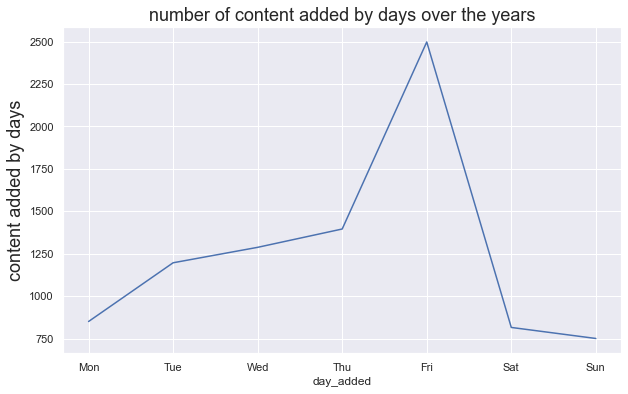

In [73]:
plt.close()
plt.figure(figsize=(10,6))
sns.lineplot(x = "day_added", y = "title", data = D_added)
#plt.bar(x = Y_added["year_added"], y = Y_added["title"])
plt.ylabel("content added by days",fontsize=18)
plt.title("number of content added by days over the years",fontsize=18)
#plt.xlabel("content added by year",fontsize=18)
#plt.show()
# plt.xticks(20)
#plt.xticks(np.arange(2007,2023,1),rotation = 90)

plt.savefig("contentByDayadded.png")


**Most Contents were added on Fridays**

## Analysis by Tv shows vs Movies by years,months and days 

### creating seperate datasets for Movies and TV Shows for further analysis 

In [79]:
TV_shows = df.loc[df["type"]=="TV Show"]
Movies = df.loc[df["type"]=="Movie"]

In [80]:
TV_shows.groupby("year_added")["title"].nunique()

year_added
2008      1
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    595
2021    505
Name: title, dtype: int64

In [81]:
Movies.groupby("year_added")["title"].nunique()

year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
Name: title, dtype: int64

### By Year

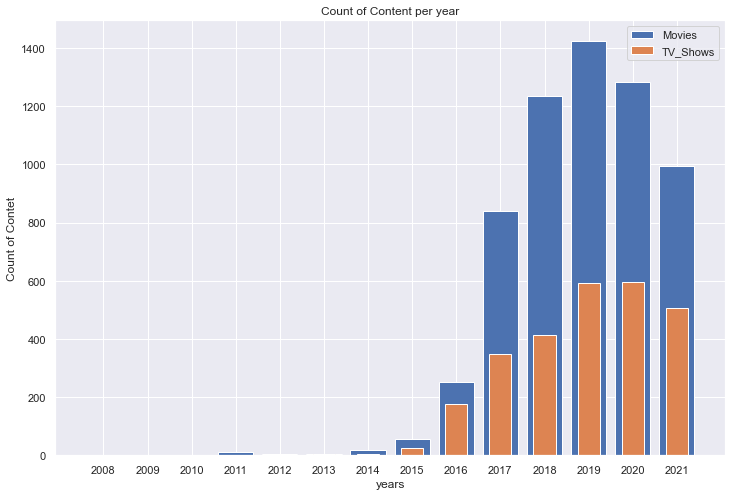

In [84]:
plt.figure(figsize=(12,8))
plt.bar(Movies.groupby("year_added")["title"].nunique().index,
        Movies.groupby("year_added")["title"].nunique())
plt.bar((TV_shows.groupby("year_added")["title"].nunique().index),
        TV_shows.groupby("year_added")["title"].nunique(),
        width=0.5 )
plt.xticks(rotation = 0)

plt.title("Count of Content per year")
plt.xlabel("years")
plt.ylabel("Count of Contet")



plt.legend(["Movies","TV_Shows"])
plt.show()

### By month

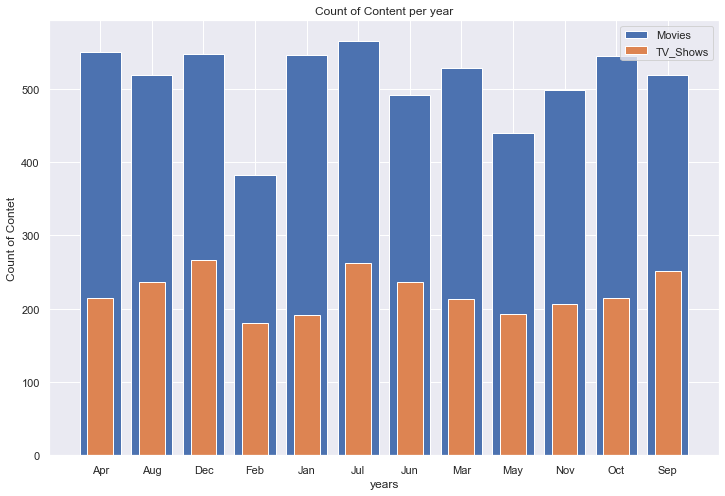

In [91]:
plt.figure(figsize=(12,8))
plt.bar(Movies.groupby("month_added")["title"].nunique().index,
        Movies.groupby("month_added")["title"].nunique())
plt.bar((TV_shows.groupby("month_added")["title"].nunique().index),
        TV_shows.groupby("month_added")["title"].nunique(),
        width=0.5 )
plt.xticks(rotation = 0)

plt.title("Count of Content per year")
plt.xlabel("years")
plt.ylabel("Count of Contet")



plt.legend(["Movies","TV_Shows"])
plt.show()

### By Days

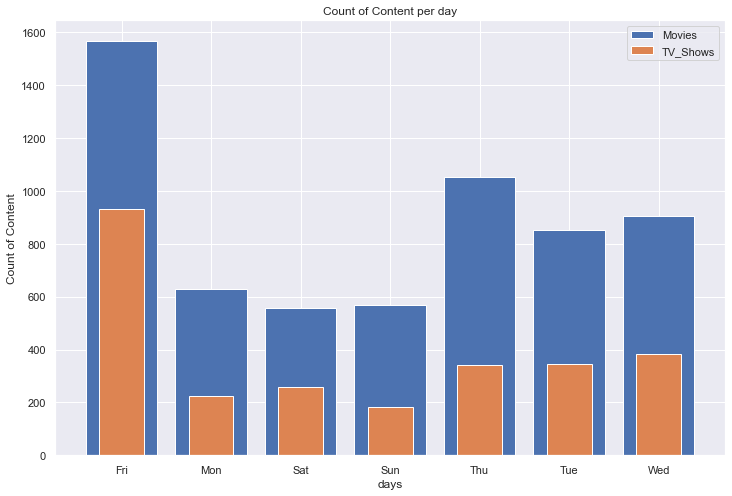

In [92]:
plt.figure(figsize=(12,8))
plt.bar(Movies.groupby("day_added")["title"].nunique().index,
        Movies.groupby("day_added")["title"].nunique())
plt.bar((TV_shows.groupby("day_added")["title"].nunique().index),
        TV_shows.groupby("day_added")["title"].nunique(),
        width=0.5 )
plt.xticks(rotation = 0)

plt.title("Count of Content per day")
plt.xlabel("days")
plt.ylabel("Count of Content")



plt.legend(["Movies","TV_Shows"])
plt.show()


#### Recommendation : 
 It would be appropriate decision if we add content based on past data as per best actors and directors, or produce more movies specifically for Netflix . 

# Deep Dive into Data

### Analysis by casts, directors, genres and countries

In [18]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'year_added', 'month_added',
       'day_added', 'Movie_duration', 'Series_duration'],
      dtype='object')

#### unnesting columns 

In [340]:
actors = df["cast"].apply(lambda x:str(x).split(", ")).tolist()
actors = pd.DataFrame(actors,index=df["title"])
actors = actors.stack()
actors = pd.DataFrame(actors).reset_index()
actors = actors[["title",0]]
actors.columns = ["title","actors"]

directors = df["director"].apply(lambda x:str(x).split(", ")).tolist()
directors = pd.DataFrame(directors,index=df["title"])
directors = directors.stack()
directors = pd.DataFrame(directors).reset_index()
directors = directors[["title",0]]
directors.columns = ["title","directors"]

countries = df["country"].apply(lambda x:str(x).split(", ")).tolist()
countries = pd.DataFrame(countries,index=df["title"])
countries = countries.stack()
countries = pd.DataFrame(countries).reset_index()
countries = countries[["title",0]]
countries.columns = ["title","countries"]

genres = df["listed_in"].apply(lambda x:str(x).split(", ")).tolist()
genres = pd.DataFrame(genres,index=df["title"])
genres = genres.stack()
genres = pd.DataFrame(genres).reset_index()
genres = genres[["title",0]]
genres.columns = ["title","genres"]

#### Merging unnested data with original data frame : 

In [341]:
data = pd.merge(pd.merge(pd.merge(pd.merge(actors,directors,on="title"),countries,on="title"),genres,on="title"),df,on="title")

In [342]:
data.columns

Index(['title', 'actors', 'directors', 'countries', 'genres', 'type',
       'director', 'cast', 'country', 'date_added', 'release_year', 'rating',
       'duration', 'listed_in', 'year_added', 'month_added', 'day_added',
       'Content_For'],
      dtype='object')

In [98]:
data.head(2)

,title,actors,directors,countries,genres,type,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added,Content_For
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,Movie,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,Sep,Sat,Teens
1,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,Sep,Fri,Adults


##### dropping unncessary old nested data  

In [343]:
data.drop(["cast","director","country","listed_in"],axis = 1,inplace=True)

In [100]:
data.head(2)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,duration,year_added,month_added,day_added,Content_For
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,90 min,2021,Sep,Sat,Teens
1,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults


In [101]:
data.shape

(201991, 14)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   title            201991 non-null  object        
 1   actors           201991 non-null  object        
 2   directors        201991 non-null  object        
 3   countries        201991 non-null  object        
 4   genres           201991 non-null  object        
 5   type             201991 non-null  object        
 6   date_added       201833 non-null  datetime64[ns]
 7   release_year     201991 non-null  int64         
 8   rating           201924 non-null  object        
 9   year_added       201833 non-null  float64       
 10  month_added      201833 non-null  object        
 11  Movie_duration   145840 non-null  float64       
 12  Series_duration  56148 non-null   float64       
 13  Content_For      201924 non-null  object        
dtypes: datetime64[ns](1)

## Analysis by genres

##### most popular genres on netflix are:

In [140]:
totalcontent_in_all_genres = data.groupby("genres")["title"].nunique()
totalcontent_in_all_genres=totalcontent_in_all_genres.sort_values(ascending=False)
totalcontent_in_all_genres.head(10)

genres
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: title, dtype: int64

##### different Genres with their Movie Counts :



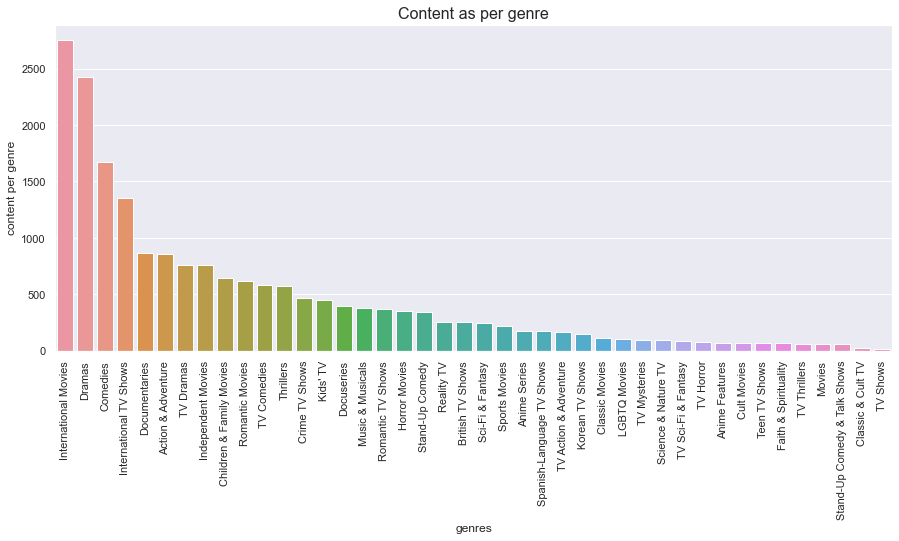

In [139]:

plt.close()
plt.figure(figsize=(15,6))
sns.barplot(x = totalcontent_in_all_genres.index , y= totalcontent_in_all_genres)
plt.title("Content as per genre",fontsize=16)
#plt.xlabel("genres")
plt.ylabel("content per genre")
plt.xticks(rotation = 90)
#plt.show()
plt.savefig("contentbyGenre.png")


In [125]:
genresbyyears=data.groupby(["release_year","genres"])["title"].aggregate(title="nunique"
                                                        ).sort_values(by="title",ascending=False).head(50)

In [126]:
genresbyyears.head(2)

,,title
release_year,genres,
2018,International Movies,340
2017,International Movies,328


In [127]:
pivot = np.round(pd.pivot_table(genresbyyears, values='title', 
                                index='release_year', 
                               columns='genres', 
                               aggfunc=np.mean),2)

In [128]:
pivot

genres,Action & Adventure,Children & Family Movies,Comedies,Crime TV Shows,Documentaries,Dramas,Independent Movies,International Movies,International TV Shows,TV Comedies,TV Dramas,Thrillers
release_year,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,83.0,NaN,121.0,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,104.0,NaN,127.0,NaN,NaN,NaN,NaN
2015,NaN,NaN,94.0,NaN,NaN,180.0,NaN,210.0,93.0,NaN,NaN,NaN
2016,NaN,NaN,150.0,NaN,137.0,265.0,101.0,305.0,133.0,NaN,NaN,NaN
2017,89.0,NaN,164.0,NaN,172.0,285.0,113.0,328.0,136.0,NaN,NaN,NaN
2018,NaN,NaN,178.0,NaN,120.0,304.0,131.0,340.0,190.0,82.0,109.0,83.0
2019,NaN,82.0,159.0,92.0,104.0,243.0,NaN,282.0,201.0,NaN,133.0,NaN
2020,NaN,83.0,133.0,87.0,NaN,195.0,NaN,239.0,214.0,105.0,127.0,NaN
2021,NaN,NaN,NaN,NaN,NaN,92.0,NaN,141.0,149.0,NaN,83.0,NaN


<Figure size 1080x720 with 0 Axes>

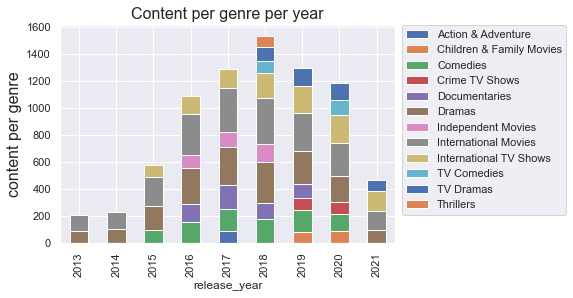

In [129]:
plt.close()
plt.figure(figsize=(15,10))
pivot.plot(kind='bar', stacked=True)
plt.ylabel("content per genre",fontsize=16)
plt.savefig("contentbyGenrebyyear.png")
plt.title("Content per genre per year",fontsize=16)
#plt.legend(loc='outer right')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("contentbyGenrebyyear.png")

In [436]:
genresbycounty=data.groupby(["countries","genres"])["title"].aggregate(title="nunique"
                                                        ).sort_values(by="title",ascending=False).head(50)

In [437]:
genresbycounty.head()

title
countries     genres                     
India         International Movies    864
United States Dramas                  835
              Comedies                680
India         Dramas                  662
United States Documentaries           511

In [438]:
pivotc = np.round(pd.pivot_table(genresbycounty, values='title', 
                                index='countries', 
                               columns='genres', 
                               aggfunc=np.mean),2)

<Figure size 1080x1080 with 0 Axes>

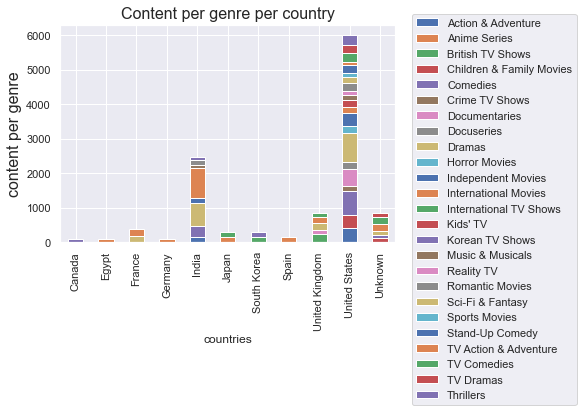

In [452]:
plt.close()
plt.figure(figsize=(15,15))
pivotc.plot(kind='bar', stacked=True)
plt.ylabel("content per genre",fontsize=16)
plt.savefig("contentbyGenrebycountries.png")
plt.title("Content per genre per country",fontsize=16)
#plt.legend(loc='outer right')
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0)
plt.savefig("contentbyGenrebycountries.png")

In [431]:
data.columns

Index(['title', 'actors', 'directors', 'countries', 'genres', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'year_added',
       'month_added', 'day_added', 'Content_For', 'Movie_duration',
       'Series_duration', 'Movie_length', 'Series_length'],
      dtype='object')

In [ ]:
plt.close()
plt.figure(figsize=(15,10))
pivot.plot(kind='bar', stacked=True)
plt.ylabel("content per genre",fontsize=16)
plt.savefig("contentbyGenrebyyear.png")
plt.title("Content per genre per year",fontsize=16)
#plt.legend(loc='outer right')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig("contentbyGenrebyyear.png")

# GLOBAL INSIGHTS 

## Top actors produces the most content 

### top 20 actors : their maximum number of content they have worked on and countires they have worked in .

In [150]:
# mostpopularactor abroad
actorsworkabroad=data.groupby("actors")[["title","countries"]].aggregate({"title":"nunique",
                                                       "countries":"nunique"}).sort_values(by="title",ascending=False).head(20)[1:]


In [151]:
actorsworkabroad

,title,countries
actors,,
Anupam Kher,43,5
Shah Rukh Khan,35,5
Julie Tejwani,33,2
Naseeruddin Shah,32,4
Takahiro Sakurai,32,2
Rupa Bhimani,31,2
Om Puri,30,6
Akshay Kumar,30,2
Yuki Kaji,29,2


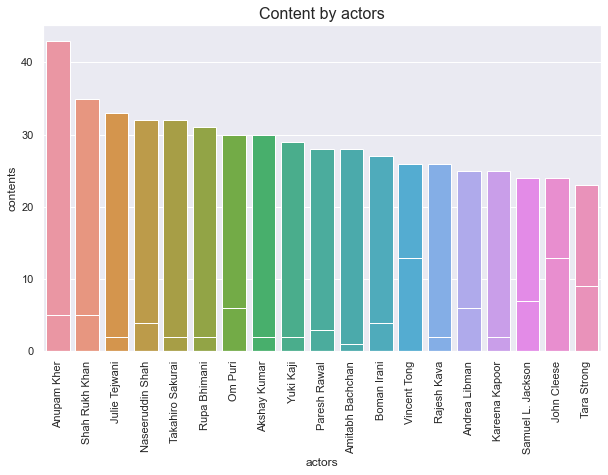

In [162]:
plt.close()
plt.figure(figsize=(10,6))

sns.barplot(x = actorsworkabroad.index , y="title" , data = actorsworkabroad)
sns.barplot(x = actorsworkabroad.index , y="countries" , data = actorsworkabroad)
plt.title("Content by actors",fontsize=16)
plt.xlabel("actors")
plt.ylabel("contents")
plt.xticks(rotation = 90)
#plt.show()
plt.savefig("contentbyactorss.png")

#### top 20 directors  : their number of content and the counties they have worked in . 

In [163]:
contentbydirectors=data.groupby("directors")[["title","countries"]].aggregate({"title":"nunique",
                                                        "countries":"nunique"}).sort_values(by="title",ascending=False).head(20)[1:]


In [164]:
contentbydirectors.head(20)

,title,countries
directors,,
Rajiv Chilaka,22,2
Jan Suter,21,4
Raúl Campos,19,4
Marcus Raboy,16,2
Suhas Kadav,16,2
Jay Karas,15,1
Cathy Garcia-Molina,13,1
Jay Chapman,12,1
Martin Scorsese,12,6


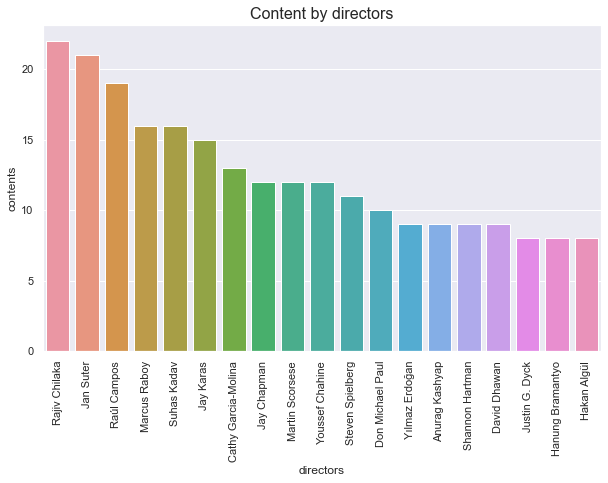

In [165]:
plt.close()
plt.figure(figsize=(10,6))
sns.barplot(contentbydirectors,x=contentbydirectors.index,y="title")
#sns.barplot(x = "directors" , y="title" , data = contentbydirectors[1:] )
plt.title("Content by directors",fontsize=16)
plt.xlabel("directors")
plt.ylabel("contents")
plt.xticks(rotation = 90)
#plt.show()
plt.savefig("contentbydirectors.png")

## number of Content per Country on Netflix

In [166]:
movies_per_country  = data.groupby("countries")["title"].nunique().sort_values(ascending=False).head(20)
movies_per_country

countries
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Name: title, dtype: int64

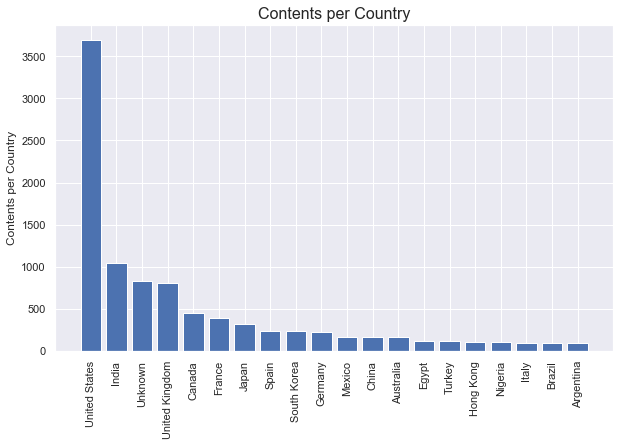

In [167]:
plt.close()
plt.figure(figsize=(10,6))
plt.bar(movies_per_country.index,height=movies_per_country)

#plt.xlabel("Countires")
plt.ylabel("Contents per Country")
plt.title("Contents per Country",fontsize=16)
# plt.xticks(20)
plt.xticks(rotation = 90)

plt.savefig("contentpercountry.png")
#plt.show()

In [73]:
(data.groupby("countries")["title"].nunique().sort_values(ascending=False).head(20).sum()/10845)*100

86.97095435684648

**Observation: 87 % of the Contents is from above 20 Countries.**

### top actors produces contents per genre globally

In [169]:

for genre in totalcontent_in_all_genres.index[1:10]:
    print()
    print(genre)
    print("== Actor ======= number of movies =")
    print(data[data["genres"]==genre].groupby("actors")["title"].nunique().sort_values(ascending=False).head(10))
    print()
    


Dramas
== Actor ======= number of movies =
actors
Anupam Kher            28
Shah Rukh Khan         28
Naseeruddin Shah       28
Amitabh Bachchan       20
Om Puri                20
Nawazuddin Siddiqui    18
Paresh Rawal           18
Kay Kay Menon          17
Akshay Kumar           16
Kareena Kapoor         15
Name: title, dtype: int64


Comedies
== Actor ======= number of movies =
actors
Anupam Kher         20
Paresh Rawal        18
Adam Sandler        18
Akshay Kumar        15
Shah Rukh Khan      15
Hassan Hosny        15
Boman Irani         15
David Spade         14
Maya Rudolph        14
Naseeruddin Shah    13
Name: title, dtype: int64


International TV Shows
== Actor ======= number of movies =
actors
Unknown             109
Takahiro Sakurai     22
Yuki Kaji            18
Junichi Suwabe       16
Ai Kayano            16
Yoshimasa Hosoya     14
Daisuke Ono          14
Yuichi Nakamura      13
Jun Fukuyama         13
Takehito Koyasu      13
Name: title, dtype: int64


Documentaries
== 

### top Directors per perticular genre :(Internationally)

In [174]:
for genre in totalcontent_in_all_genres.index[1:10]:
    print()
    print(genre)
    print("== Directors ======= number of movies =")
    print(data[data["genres"]==genre].groupby("directors")["title"].nunique().sort_values(ascending=False).head(10)[1:])
    print()
    


Dramas
== Directors ======= number of movies =
directors
Youssef Chahine        12
Martin Scorsese         9
Cathy Garcia-Molina     9
Hanung Bramantyo        8
Hidenori Inoue          7
S.S. Rajamouli          7
Clint Eastwood          6
Sooraj R. Barjatya      6
Yılmaz Erdoğan          6
Name: title, dtype: int64


Comedies
== Directors ======= number of movies =
directors
David Dhawan           9
Suhas Kadav            8
Hakan Algül            8
Prakash Satam          7
Cathy Garcia-Molina    7
Robert Rodriguez       6
Yılmaz Erdoğan         6
Fernando Ayllón        6
Wenn V. Deramas        6
Name: title, dtype: int64


International TV Shows
== Directors ======= number of movies =
directors
Alastair Fothergill        3
Jung-ah Im                 2
Hsu Fu-chun                2
Shin Won-ho                2
Abhishek Chaubey           1
Nopparoj Chotmunkongsit    1
Obi Emelonye               1
Olivier Megaton            1
Onur Ünlü                  1
Name: title, dtype: int64


Docume

## Actors and directors who have worked  globally in multiple countires 

In [80]:
## top 10 directors who have content in maximum number of countires 

In [178]:
data.groupby("directors")["countries"].nunique().sort_values(ascending =False).head(10)[1:]

directors
Matthew Salleh        12
Joshua Oppenheimer    10
Farhad Safinia         8
Martin Campbell        8
James Watkins          7
Aaron Woodley          7
Renny Harlin           7
Nora Twomey            7
Brian De Palma         7
Name: countries, dtype: int64

In [82]:
## top 10 actors who have content in maximum number of countires 

In [177]:
data.groupby("actors")["countries"].nunique().sort_values(ascending =False).head(10)[1:]

actors
Alfred Molina         14
Paul Giamatti         14
Mads Mikkelsen        13
Ben Whishaw           13
James Franco          13
Eddie Marsan          13
Vincent Tong          13
Sylvester Stallone    13
John Cleese           13
Name: countries, dtype: int64

In [84]:
# possible content of these people is watched all over in the world we can say! 

## Top 20 Versatile Actors who have worked in various types of movies:

#### also their movie counts in the title column

In [179]:
data.columns

Index(['title', 'actors', 'directors', 'countries', 'genres', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'year_added',
       'month_added', 'day_added', 'Content_For'],
      dtype='object')

In [182]:
versatile_actor=data.groupby("actors")["genres","title"].aggregate({
    "genres":"nunique",
    "title":"nunique"
}).sort_values(by = ["genres","title"],ascending=[False,False]).head(20)[1:]

In [186]:
versatile_actor

,genres,title
actors,,
Ron Perlman,17,13
Gary Cole,16,11
Kiernan Shipka,16,9
Glenn Close,15,12
Anupam Kher,14,43
Samuel L. Jackson,14,24
Rajesh Sharma,14,18
Antonio Banderas,14,15
Ben Kingsley,14,15


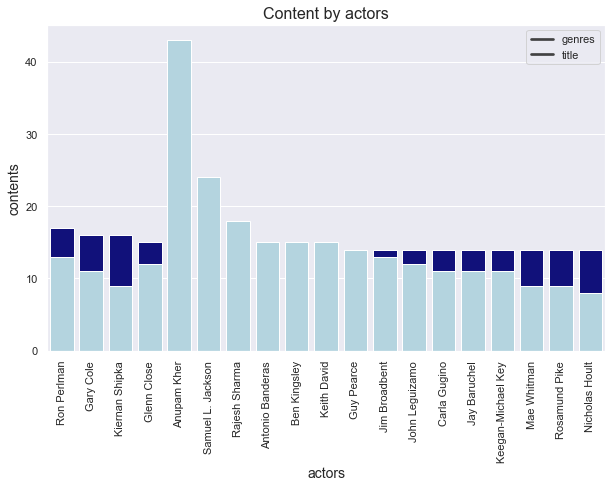

In [192]:
plt.close()
plt.figure(figsize=(10,6))

sns.barplot(x = versatile_actor.index , y="genres" , data = versatile_actor,color='darkblue')
sns.barplot(x = versatile_actor.index , y="title" , data = versatile_actor,color='lightblue')
plt.title("Content by actors",fontsize=16)
plt.xlabel("actors",fontsize=14)
plt.ylabel("contents",fontsize=14)
plt.xticks(rotation = 90)
plt.legend(labels=["genres","title"])

#plt.show()
plt.savefig("contentbyactorsovergenres.png")

**Observations: Most of the famous and versatile directors from India is Anupam Kher.**

# Top 20 Versatile Directors who have worked in various types of movies:

### also their movie counts in the title column

In [203]:
versatile_director=data.groupby("directors")["genres","title"].aggregate({
    "genres":"nunique",
    "title":"nunique"
}).sort_values(by = ["genres","title"],ascending=[False,False]).head(20)[1:]
versatile_director

,genres,title
directors,,
Martin Scorsese,9,12
Anurag Kashyap,9,9
Priyadarshan,8,7
Abhishek Chaubey,8,5
Vishal Bhardwaj,8,5
Vikramaditya Motwane,8,4
Ifa Isfansyah,8,3
David Dhawan,7,9
Clint Eastwood,7,7


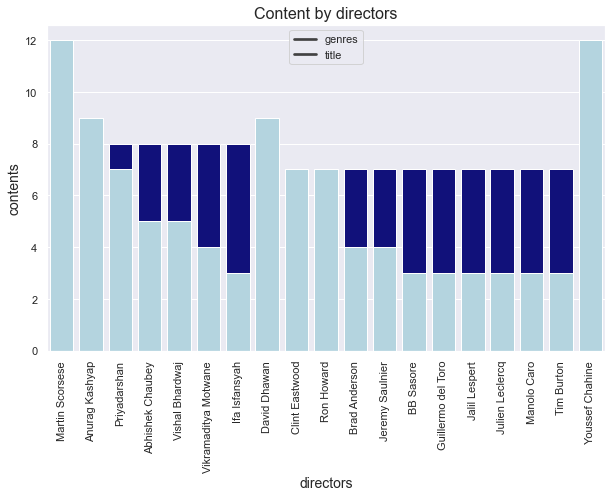

In [197]:
plt.close()
plt.figure(figsize=(10,6))

sns.barplot(x = versatile_director.index , y="genres" , data = versatile_director,color='darkblue')
sns.barplot(x = versatile_director.index , y="title" , data = versatile_director,color='lightblue')
plt.title("Content by directors",fontsize=16)
plt.xlabel("directors",fontsize=14)
plt.ylabel("contents",fontsize=14)
plt.xticks(rotation = 90)
plt.legend(labels=["genres","title"])

#plt.show()
plt.savefig("contentbydirectorssovergenres.png")

**Observations: Most of the famous and versatile directors are from India.**

## Number of movie and series produced per year

In [344]:
data.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [345]:
data["Movie_duration"]=data['duration'][data['type']=='Movie'].str.extract('(\d+)').dropna().astype(int)
#data["Movie_duration"].astype(int)
data["Series_duration"]=data['duration'][data['type']=='TV Show'].str.extract('(\d+)').dropna().astype(int)
#data["Series_duration"].astype(int)

In [263]:
data.head(2)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,duration,year_added,month_added,day_added,Content_For,Movie_duration,Series_duration,Movie_length,Series_length
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,90 min,2021,Sep,Sat,Teens,90.0,NaN,medium,NaN
1,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,short


In [221]:
data.drop(['duration'],inplace=True, axis=1)

## categorising content duration

In [346]:
#defining duration category
#defining duration category
def category_M(x):
    if int(x) <= 60:
        return 'short'
    if (int(x) > 60 and int(x) <= 120):
        return 'medium'
    if int(x) > 120:
        return 'long'
    else:
        return 0
    
def category_S(x):
    if int(x) == 1:
        return 'short'
    if (int(x) > 1 and int(x) <= 3):
        return 'medium'
    if int(x) > 3:
        return 'long'
    else:
        return 0
    
     
 #applying the function to duration column 
data["Movie_length"] = data["Movie_duration"].dropna().apply(category_M)
data["Series_length"] = data["Series_duration"].dropna().apply(category_S)

data.head(10)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,duration,year_added,month_added,day_added,Content_For,Movie_duration,Series_duration,Movie_length,Series_length
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,90 min,2021,Sep,Sat,Teens,90.0,NaN,medium,NaN
1,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
2,Blood & Water,Ama Qamata,Unknown,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
3,Blood & Water,Ama Qamata,Unknown,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
4,Blood & Water,Khosi Ngema,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
5,Blood & Water,Khosi Ngema,Unknown,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
6,Blood & Water,Khosi Ngema,Unknown,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
7,Blood & Water,Gail Mabalane,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
8,Blood & Water,Gail Mabalane,Unknown,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
9,Blood & Water,Gail Mabalane,Unknown,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium


In [266]:
movies_series_per_year_counts = data.groupby("year_added")["Movie_duration","Series_duration"].aggregate({
    "Movie_duration":"count",
    "Series_duration":"count"
}).reset_index()

In [267]:
movies_series_per_year_counts.rename(columns={"Movie_duration":"Movie Count","Series_duration":"Series Count"},inplace=True)
movies_series_per_year_counts

,year_added,Movie Count,Series Count
0,2008,18,1
1,2009,30,0
2,2010,20,0
3,2011,438,0
4,2012,36,0
5,2013,75,132
6,2014,343,107
7,2015,1125,435
8,2016,4856,3711
9,2017,18251,6957


In [254]:
movies_seriesmean = data.groupby("year_added")["Movie_duration","Series_duration"].aggregate({
    "Movie_duration":"mean",
    "Series_duration":"mean"
}).reset_index()

In [255]:
movies_seriesmean.head()

,year_added,Movie_duration,Series_duration
0,2008,81.000000,1.0
1,2009,89.000000,NaN
2,2010,84.000000,NaN
3,2011,83.746575,NaN
4,2012,54.555556,NaN


In [274]:
#defining duration category
def category_M(x):
    if int(x) <= 60:
        return 'short'
    if (int(x) > 60 and int(x) <= 120):
        return 'medium'
    if int(x) > 120:
        return 'long'
    else:
        return 0
    
def category_S(x):
    if int(x) == 1:
        return 'short'
    if (int(x) > 1 and int(x) <= 3):
        return 'medium'
    if int(x) > 3:
        return 'long'
    else:
        return 0
    
 #applying the filter function to 'Salary' column 
movies_seriesmean["Mlength_category"] = movies_seriesmean["Movie_duration"].dropna().apply(category_M)
movies_seriesmean["Slength_category"] = movies_seriesmean["Series_duration"].dropna().apply(category_S)

## change in duration of movies and series over the years

In [275]:
movies_seriesmean.head(10)

,year_added,Movie_duration,Series_duration,length_category,Mlength_category,Slength_category
0,2008,81.000000,1.000000,medium,medium,short
1,2009,89.000000,NaN,medium,medium,NaN
2,2010,84.000000,NaN,medium,medium,NaN
3,2011,83.746575,NaN,medium,medium,NaN
4,2012,54.555556,NaN,short,short,NaN
5,2013,105.986667,3.833333,medium,medium,medium
6,2014,83.903790,4.028037,medium,medium,long
7,2015,91.312000,3.149425,medium,medium,medium
8,2016,98.068575,1.403934,medium,medium,short
9,2017,105.126349,1.855397,medium,medium,short


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2021'),
  Text(1, 0, '2020'),
  Text(2, 0, '2019'),
  Text(3, 0, '2018'),
  Text(4, 0, '2017'),
  Text(5, 0, '2016'),
  Text(6, 0, '2015'),
  Text(7, 0, '2014'),
  Text(8, 0, '2013'),
  Text(9, 0, '2012'),
  Text(10, 0, '2011'),
  Text(11, 0, '2009'),
  Text(12, 0, '2008'),
  Text(13, 0, '2010')])

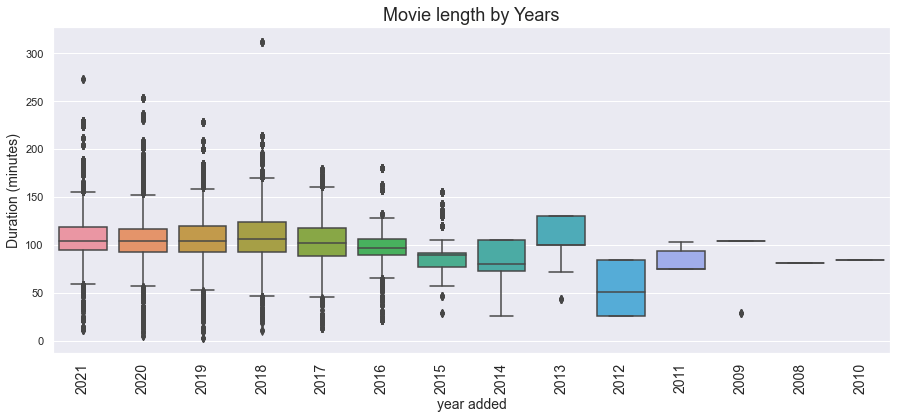

In [284]:
plt.close()
plt.figure(figsize=(15,6))
sns.boxplot(x="year_added",
                y="Movie_duration",
                data=data)
plt.title("Movie length by Years",fontsize=18)
plt.xlabel("year added",fontsize=14)
plt.ylabel("Duration (minutes)",fontsize=14)
plt.xticks(fontsize=14,rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2021'),
  Text(1, 0, '2020'),
  Text(2, 0, '2019'),
  Text(3, 0, '2018'),
  Text(4, 0, '2017'),
  Text(5, 0, '2016'),
  Text(6, 0, '2015'),
  Text(7, 0, '2014'),
  Text(8, 0, '2013'),
  Text(9, 0, '2012'),
  Text(10, 0, '2011'),
  Text(11, 0, '2009'),
  Text(12, 0, '2008'),
  Text(13, 0, '2010')])

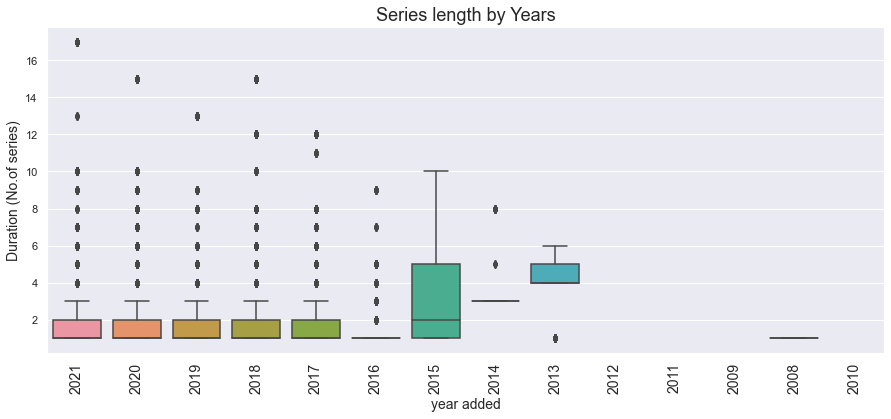

In [285]:
plt.close()
plt.figure(figsize=(15,6))
sns.boxplot(x="year_added",
                y="Series_duration",
                data=data)
plt.title("Series length by Years",fontsize=18)
plt.xlabel("year added",fontsize=14)
plt.ylabel("Duration (No.of series)",fontsize=14)
plt.xticks(fontsize=14,rotation = 90)


In [91]:
data.groupby("year_added")["Series_duration"].mean()

year_added
2008.0    1.000000
2009.0         NaN
2010.0         NaN
2011.0         NaN
2012.0         NaN
2013.0    3.833333
2014.0    4.028037
2015.0    3.149425
2016.0    1.403934
2017.0    1.855397
2018.0    1.865676
2019.0    1.698579
2020.0    2.130502
2021.0    2.064296
Name: Series_duration, dtype: float64

### Trend around how the movie/series length as increased over the years. 

Text(0, 0.5, 'Movie Duration Trend Line')

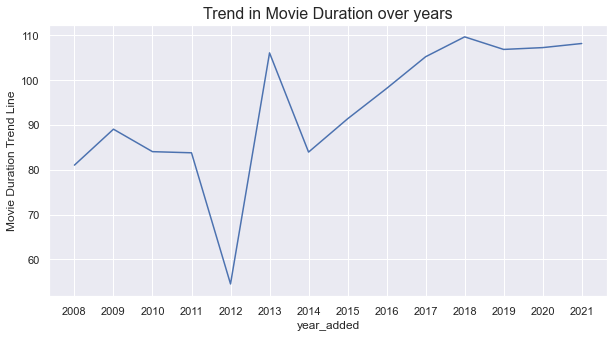

In [293]:
plt.figure(figsize=(10,5))

# sns.boxplot(x = data["Movie_duration"] )
sns.lineplot(x = data.groupby("year_added")["Movie_duration"].mean().index,
             y = data.groupby("year_added")["Movie_duration"].mean())

plt.title("Trend in Movie Duration over years",fontsize=16)
plt.ylabel("Movie Duration Trend Line")


In [299]:
data.columns

Index(['title', 'actors', 'directors', 'countries', 'genres', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'year_added',
       'month_added', 'day_added', 'Content_For', 'Movie_duration',
       'Series_duration', 'Movie_length', 'Series_length'],
      dtype='object')

Text(0.5, 1.0, 'Yearwise Movie Length')

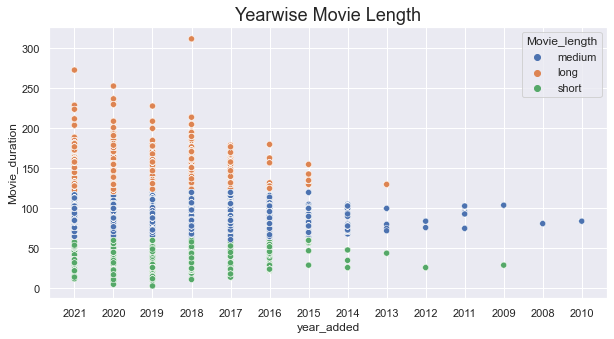

In [303]:
plt.close()
plt.figure(figsize=(10,5))
sns.scatterplot(x = "year_added",y = "Movie_duration",hue='Movie_length',data=data)
plt.title("Yearwise Movie Length",fontsize=18)

Text(0.5, 1.0, 'Trend in Series Duration over years')

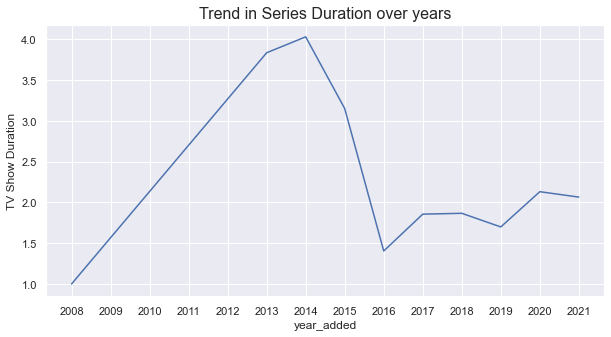

In [294]:
plt.figure(figsize=(10,5))

# sns.boxplot(x = data["Movie_duration"] )
sns.lineplot(x = data.groupby("year_added")["Series_duration"].mean().index,
             y = data.groupby("year_added")["Series_duration"].mean())

plt.ylabel("TV Show Duration")
plt.title("Trend in Series Duration over years",fontsize=16)


### Observation: Movie length remains under 2hr for last several years, however, Series length were increased till 2014 then start decreasing to around 2 series.

#### Movie titles with duration and 

In [323]:
Movie_duration = data.groupby("title")["Movie_duration"].value_counts()
Movie_duration = pd.DataFrame(Movie_duration)
Movie_duration.rename({"Movie_duration":"Mcounts"},axis = 1,inplace=True)
Movie_duration.reset_index()["Movie_duration"]
Movie_duration.head()

,,Mcounts
title,Movie_duration,
#Alive,99.0,6
#AnneFrank - Parallel Stories,95.0,8
#FriendButMarried,102.0,24
#FriendButMarried 2,104.0,24
#Roxy,105.0,16


<AxesSubplot: xlabel='Movie_duration', ylabel='Count'>

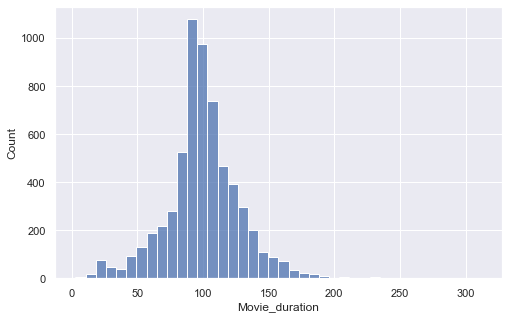

In [324]:
plt.figure(figsize=(8,5))
sns.histplot(Movie_duration.reset_index()["Movie_duration"],bins = 40)


### Duration of Movies and Series : distribution plot 

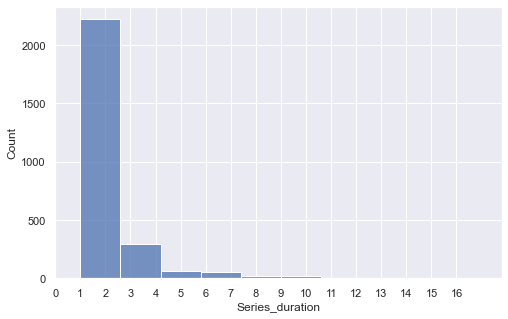

In [325]:
plt.figure(figsize=(8,5))
Series_duration = data.groupby("title")["Series_duration"].value_counts()
Series_duration = pd.DataFrame(Series_duration)
Series_duration.rename({"Series_duration":"Scount"},axis = 1,inplace=True)
Series_duration.reset_index()["Series_duration"]
sns.histplot(Series_duration.reset_index()["Series_duration"],bins = 10)
plt.xticks(np.arange(0,17,1))
plt.show()

#### Observation: looks like majority of the Movie content is around 75 to 125 min long, however, Series/TV Shows are 1 to 3 seasons long . 

#### adding longer content may or may not be benifiical 

#### below is the data , for Movies and TV shows with highest duration and yet famous.

### Maximum Length Content yet Popular , and their Directors : 

#### this infomation can be helpful in increasing the watch time on Netflix by producing/adding their Movies/series. 

In [243]:

data.groupby("title")["Series_duration","directors"].aggregate({"Series_duration":"max", "directors":"unique"}).sort_values(by="Series_duration",ascending=False).head(10)


,Series_duration,directors
title,,
Grey's Anatomy,17.0,[Unknown]
NCIS,15.0,[Unknown]
Supernatural,15.0,[Phil Sgriccia]
Red vs. Blue,13.0,[Unknown]
Heartland,13.0,[Unknown]
COMEDIANS of the world,13.0,[Unknown]
Criminal Minds,12.0,[Unknown]
Trailer Park Boys,12.0,[Unknown]
Cheers,11.0,[Unknown]


In [242]:

data.groupby("title")["Movie_duration","directors"].aggregate({"Movie_duration":"max",
                                                                 "directors":"unique"}).sort_values(by="Movie_duration",ascending=False).head(10)

,Movie_duration,directors
title,,
Black Mirror: Bandersnatch,312.0,[Unknown]
Headspace: Unwind Your Mind,273.0,[Unknown]
The School of Mischief,253.0,[Houssam El-Din Mustafa]
No Longer kids,237.0,[Samir Al Asfory]
Lock Your Girls In,233.0,[Fouad El-Mohandes]
Raya and Sakina,230.0,[Hussein Kamal]
Once Upon a Time in America,229.0,[Sergio Leone]
Sangam,228.0,[Raj Kapoor]
Lagaan,224.0,[Ashutosh Gowariker]


### Favorite TV shows and Movies by countries

In [348]:
TV_shows = data.loc[data["type"]=="TV Show"]
TV_shows.shape

(56148, 18)

In [329]:
TV_shows.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'year_added',
       'month_added', 'day_added', 'Content_For'],
      dtype='object')

In [349]:
Movies = data.loc[data["type"]=="Movie"]
Movies.shape

(145843, 18)

In [330]:
tvcount = TV_shows.groupby("country")["title"].nunique().sort_values(ascending=False).reset_index()


In [331]:
mcount = Movies.groupby("country")["title"].nunique().sort_values(ascending=False).reset_index()

In [333]:
TVM_per_country = tvcount.merge(mcount,on="country",how = "outer")

In [334]:
TVM_per_country.rename({"title_x":"TV Shows Count",
                              "title_y":"Movies Counts"},axis = 1,inplace=True)

In [335]:
TVM_per_country.head(10)

,country,TV Shows Count,Movies Counts
0,United States,760.0,2058.0
1,Unknown,391.0,440.0
2,United Kingdom,213.0,206.0
3,Japan,169.0,76.0
4,South Korea,158.0,41.0
5,India,79.0,893.0
6,Taiwan,68.0,13.0
7,Canada,59.0,122.0
8,France,49.0,75.0
9,Spain,48.0,97.0


### Movies Counts - TV Shows Count as per Top Countires : 


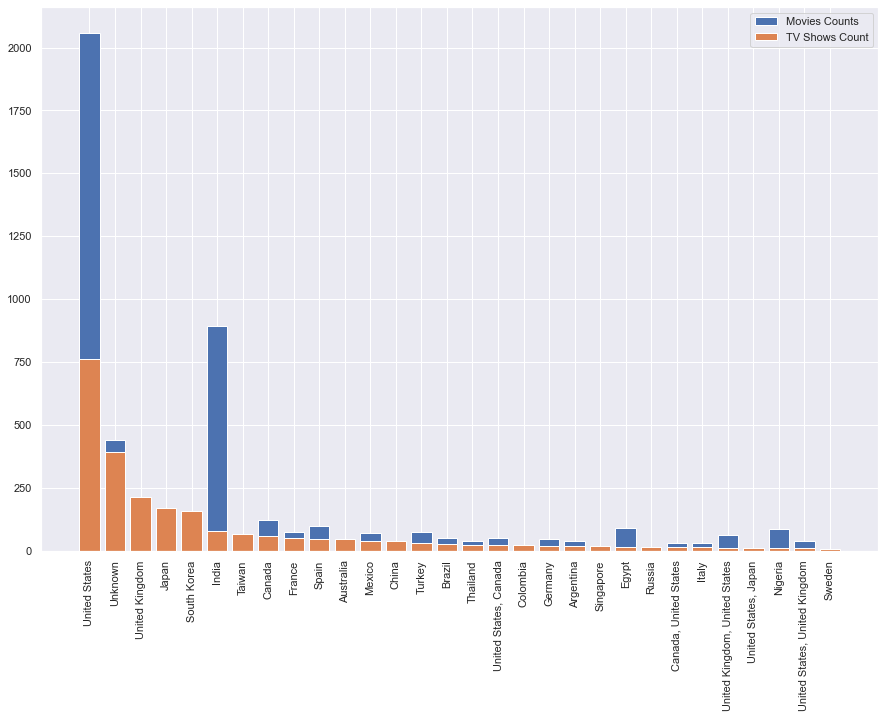

In [337]:
plt.figure(figsize=(15,10))
plt.bar(TVM_per_country["country"].head(30),TVM_per_country["Movies Counts"].head(30))
plt.bar(TVM_per_country["country"].head(30),TVM_per_country["TV Shows Count"].head(30))
plt.xticks(rotation = 90)
plt.legend(["Movies Counts","TV Shows Count"])

plt.show()

#### United Kingdom, Japan, South Korea, Taiwan, Australia, China, Combodia , Singapore : has more tv shows content compare to movies ! 

#### We can recommend to focus more on TV shows than Movies in those above countires ! 

#### India, USA, Egypt, Nigeria has more content of Movies compare to TV shows , and for rest of the countires it is equally distributed . 

### Top directors / actors by Movies and TV shows

In [350]:
TV_shows.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

actors
Takahiro Sakurai      25
Yuki Kaji             19
Junichi Suwabe        17
Daisuke Ono           17
Ai Kayano             17
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Vincent Tong          13
Name: title, dtype: int64

In [351]:
TV_shows.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)[1:]

directors
Ken Burns              3
Alastair Fothergill    3
Stan Lathan            2
Joe Berlinger          2
Name: title, dtype: int64

In [352]:
Movies.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

actors
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Paresh Rawal        28
Julie Tejwani       28
Amitabh Bachchan    28
Rupa Bhimani        27
Boman Irani         27
Name: title, dtype: int64

In [353]:
Movies.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

directors
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: title, dtype: int64

# Analysing and plotting for Top actors/directors and genres for Top 4 countries

# For United States

In [355]:
United_States = data.loc[data["countries"] == "United States"]
United_States.head(2)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,duration,year_added,month_added,day_added,Content_For,Movie_duration,Series_duration,Movie_length,Series_length
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,90 min,2021,Sep,Sat,Teens,90.0,NaN,medium,NaN
179,Sankofa,Kofi Ghanaba,Haile Gerima,United States,Dramas,Movie,2021-09-24,1993,TV-MA,125 min,2021,Sep,Fri,Adults,125.0,NaN,long,NaN


In [356]:
United_States.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20)

genres
Dramas                      835
Comedies                    680
Documentaries               511
Action & Adventure          404
Independent Movies          390
Children & Family Movies    390
Thrillers                   292
TV Comedies                 258
TV Dramas                   232
Romantic Movies             225
Stand-Up Comedy             216
Kids' TV                    214
Horror Movies               201
Docuseries                  192
Sci-Fi & Fantasy            181
International Movies        166
Music & Musicals            147
Crime TV Shows              145
Reality TV                  123
Sports Movies               113
Name: title, dtype: int64

### top 20 highest watched genres in USA

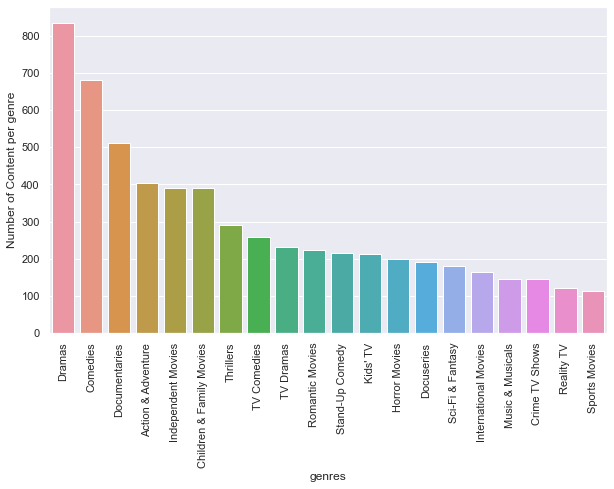

In [357]:
plt.figure(figsize=(10,6))
sns.barplot(x = United_States.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20).index ,
            y = United_States.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per genre")

plt.show()

### top 10 actors with maximum content online,  in USA

In [358]:
United_States.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

actors
Samuel L. Jackson    22
Tara Strong          22
Fred Tatasciore      21
Adam Sandler         20
Nicolas Cage         19
James Franco         19
Morgan Freeman       18
Seth Rogen           18
Molly Shannon        17
Fred Armisen         16
Name: title, dtype: int64

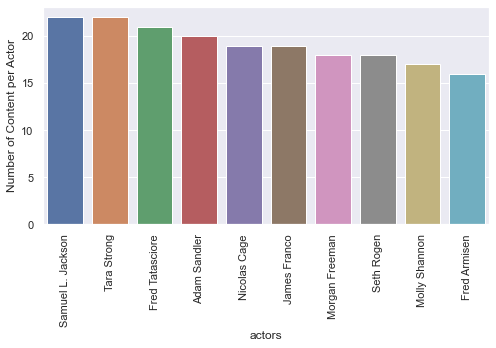

In [359]:
plt.figure(figsize=(8,4))
sns.barplot(x = United_States.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = United_States.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per Actor")
plt.show()

### top 10 directors with maximum content online,  in USA

In [360]:
United_States.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

directors
Marcus Raboy        15
Jay Karas           15
Martin Scorsese     12
Jay Chapman         12
Steven Spielberg    11
Don Michael Paul    10
Shannon Hartman      9
Ryan Polito          8
Troy Miller          8
Robert Rodriguez     8
Name: title, dtype: int64

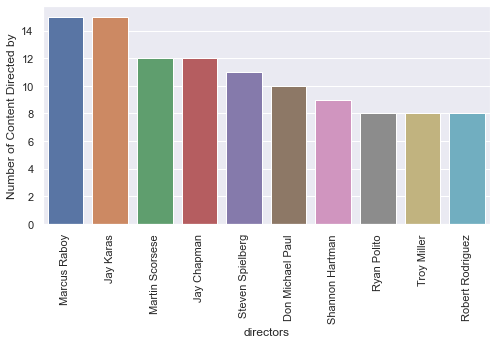

In [361]:
plt.figure(figsize=(8,4))
sns.barplot(x = United_States.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = United_States.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content Directed by")


plt.show()

# For India

In [362]:
India = data.loc[data["countries"] == "India"]
India.head(2)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,duration,year_added,month_added,day_added,Content_For,Movie_duration,Series_duration,Movie_length,Series_length
87,Kota Factory,Mayur More,Unknown,India,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
88,Kota Factory,Mayur More,Unknown,India,Romantic TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium


In [363]:
India.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20)

genres
International Movies        864
Dramas                      662
Comedies                    323
Independent Movies          167
Action & Adventure          137
Romantic Movies             120
Music & Musicals             96
Thrillers                    92
International TV Shows       66
Horror Movies                35
TV Dramas                    28
Documentaries                27
TV Comedies                  26
Children & Family Movies     26
Sports Movies                17
Sci-Fi & Fantasy             12
Romantic TV Shows            12
Kids' TV                     12
Classic Movies               11
Docuseries                    9
Name: title, dtype: int64

### Top 20 genres in India

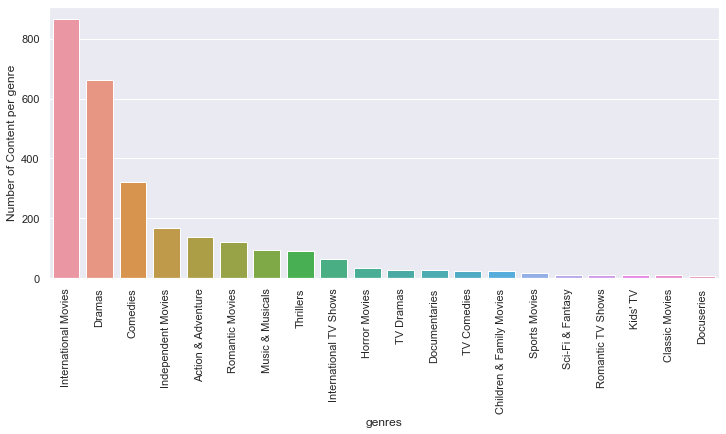

In [364]:
plt.figure(figsize=(12,5))
sns.barplot(x = India.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20).index ,
            y = India.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per genre")

plt.show()

### Top 10 actors with highest number of content

In [290]:
India.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)

actors
Anupam Kher         40
Unknown             39
Shah Rukh Khan      34
Naseeruddin Shah    31
Om Puri             29
Akshay Kumar        29
Amitabh Bachchan    28
Paresh Rawal        28
Boman Irani         27
Kareena Kapoor      25
Ajay Devgn          21
Name: title, dtype: int64

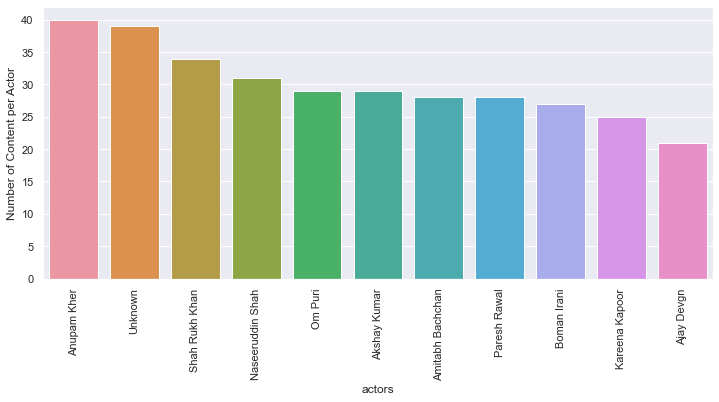

In [365]:
plt.figure(figsize=(12,5))
sns.barplot(x = India.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11).index , 
            y = India.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per Actor")
plt.show()

In [366]:
India.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

directors
David Dhawan          9
Anurag Kashyap        9
Umesh Mehra           8
Dibakar Banerjee      7
Priyadarshan          7
Ram Gopal Varma       7
Sooraj R. Barjatya    6
Imtiaz Ali            6
Karan Johar           6
Ashutosh Gowariker    6
Name: title, dtype: int64

### Top 10 directors with highest number of content

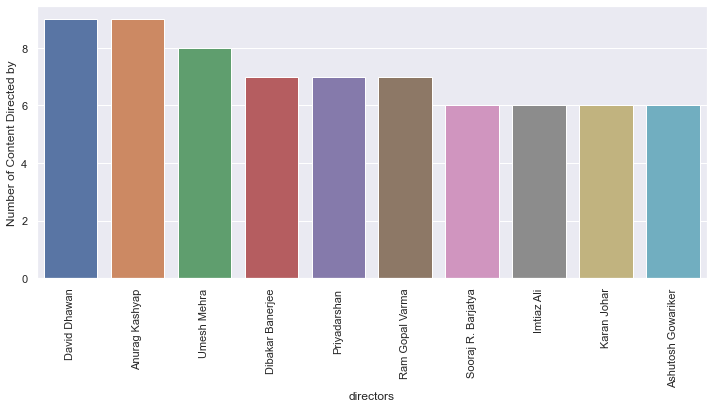

In [367]:
plt.figure(figsize=(12,5))
sns.barplot(x = India.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = India.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content Directed by")


plt.show()

##### Type of Content in India

In [372]:
pi=India.groupby("type")["title"].nunique()

In [375]:
pi

type
Movie      962
TV Show     84
Name: title, dtype: int64

<AxesSubplot: xlabel='type', ylabel='title'>

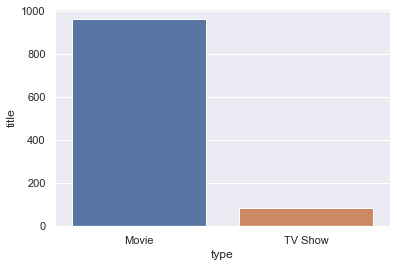

In [369]:
sns.barplot(x = India.groupby("type")["title"].nunique().index , 
           y = India.groupby("type")["title"].nunique())

#### Deep Dive in Trend of TV shows in India

In [370]:
IndiaTV_Shows = India.loc[India["type"]=="TV Show"]

In [379]:
IndiaTV_Shows.columns

Index(['title', 'actors', 'directors', 'countries', 'genres', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'year_added',
       'month_added', 'day_added', 'Content_For', 'Movie_duration',
       'Series_duration', 'Movie_length', 'Series_length'],
      dtype='object')

In [380]:
IndiaTV_Shows = IndiaTV_Shows.groupby(["title","year_added"]).nunique().reset_index()

In [381]:
IndiaTV_Shows = IndiaTV_Shows[["title","year_added"]].sort_values(by="year_added")

In [382]:
IndiaTV_Shows

,title,year_added
26,Fear Files... Har Mod Pe Darr,2017
29,Gangs of Hassepur,2017
17,Classic Legends,2017
60,Pyaar Tune Kya Kiya,2017
79,The House That Made Me,2017
...,...,...
15,Chhota Bheem,2021
14,Bombay Begums,2021
4,Alma Matters,2021
66,Sab Jholmaal Hai,2021


In [383]:
IndiaTV_Shows=  IndiaTV_Shows.groupby("year_added").nunique()
IndiaTV_Shows

,title
year_added,
2017,14
2018,17
2019,18
2020,18
2021,17


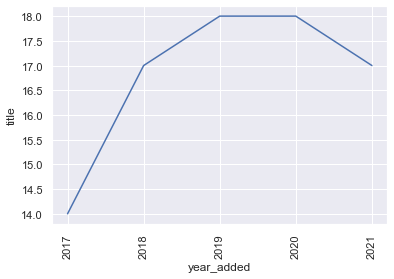

In [384]:
sns.lineplot(x = IndiaTV_Shows.index,
           y = IndiaTV_Shows["title"])
plt.xticks(rotation = 90)
plt.show()

###### looks like there were no TV shows on Netflix before 2017 .  After 2017 it was drastically increasing till 2020, and after that trend got slightly decreased , probably because of pandemic situation. 

Since the overall trendline of TV shows is increasing in India ! Netflix should focus also on producing more TV series with movies ! 

Since Most Popular Genre in India is International Movies, it it also suggested to add some international TV shows from USA and UK in NetflixIndia. 


Here are some recommended celebrities for TV shows : 

In [385]:
IndiaTVShows = India.loc[India["type"]=="TV Show"]
IndiaTVShows.head()

,title,actors,directors,countries,genres,type,date_added,release_year,rating,duration,year_added,month_added,day_added,Content_For,Movie_duration,Series_duration,Movie_length,Series_length
87,Kota Factory,Mayur More,Unknown,India,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
88,Kota Factory,Mayur More,Unknown,India,Romantic TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
89,Kota Factory,Mayur More,Unknown,India,TV Comedies,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
90,Kota Factory,Jitendra Kumar,Unknown,India,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium
91,Kota Factory,Jitendra Kumar,Unknown,India,Romantic TV Shows,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,Sep,Fri,Adults,NaN,2.0,NaN,medium


##### best directors for Indian TV shows

In [387]:
IndiaTVShows.groupby("directors")["title"].nunique().sort_values(ascending=False)[1:].head(10)

directors
Gautham Vasudev Menon        2
Anurag Kashyap               1
Nizar Shafi                  1
Vijay Roche                  1
Vignesh Shivan               1
Vetri Maaran                 1
Vasanth Sai                  1
Tharun Bhascker Dhaassyam    1
Sudha Kongara                1
Soumendra Padhi              1
Name: title, dtype: int64

In [389]:
IndiaTVShows.groupby("actors")["title"].nunique().sort_values(ascending=False)[1:].head(10)

actors
Nishka Raheja       3
Rajesh Kava         3
Aranya Kaur         2
Rajesh Tailang      2
Shanoor Mirza       2
Manish Chaudhary    2
Sabina Malik        2
Gagan Arora         2
Julie Tejwani       2
Reena Aggarwal      2
Name: title, dtype: int64

In [148]:
# Recommended Genres for Indian TV shows

In [390]:
IndiaTVShows.groupby("genres")["title"].nunique().sort_values(ascending=False).head(10)

genres
International TV Shows    66
TV Dramas                 28
TV Comedies               26
Kids' TV                  12
Romantic TV Shows         12
Docuseries                 9
Crime TV Shows             9
TV Horror                  7
Reality TV                 6
TV Action & Adventure      5
Name: title, dtype: int64

#### all tv shows in India

In [391]:
India_TV_Shows  = India.loc[India["type"]=="TV Show"]
India_TV_Shows.groupby("title")["title"].nunique().sort_values(ascending=False)

title
21 Sarfarosh: Saragarhi 1897         1
Mismatched                           1
Raja Rasoi Aur Anya Kahaniyan        1
Pyaar Tune Kya Kiya                  1
Powder                               1
                                    ..
Fear Files... Har Mod Pe Darr        1
Fabulous Lives of Bollywood Wives    1
Engineering Girls                    1
Dharmakshetra                        1
Zindagi in Short                     1
Name: title, Length: 84, dtype: int64

# For UK

In [392]:
UK = data.loc[data["countries"] == "United Kingdom"]


In [393]:
UK.head(2)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,duration,year_added,month_added,day_added,Content_For,Movie_duration,Series_duration,Movie_length,Series_length
188,Sankofa,Kofi Ghanaba,Haile Gerima,United Kingdom,Dramas,Movie,2021-09-24,1993,TV-MA,125 min,2021,Sep,Fri,Adults,125.0,NaN,long,NaN
189,Sankofa,Kofi Ghanaba,Haile Gerima,United Kingdom,Independent Movies,Movie,2021-09-24,1993,TV-MA,125 min,2021,Sep,Fri,Adults,125.0,NaN,long,NaN


In [394]:
UK.shape

(12945, 18)

### Top 20 genres in UK

In [395]:
UK.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20)

genres
British TV Shows            225
Dramas                      196
International Movies        168
International TV Shows      128
Documentaries               127
Comedies                     91
Docuseries                   89
Action & Adventure           84
Independent Movies           74
Thrillers                    61
Crime TV Shows               48
Children & Family Movies     46
TV Comedies                  44
Kids' TV                     43
Romantic Movies              38
TV Dramas                    36
Music & Musicals             36
Sci-Fi & Fantasy             35
Reality TV                   35
Horror Movies                28
Name: title, dtype: int64

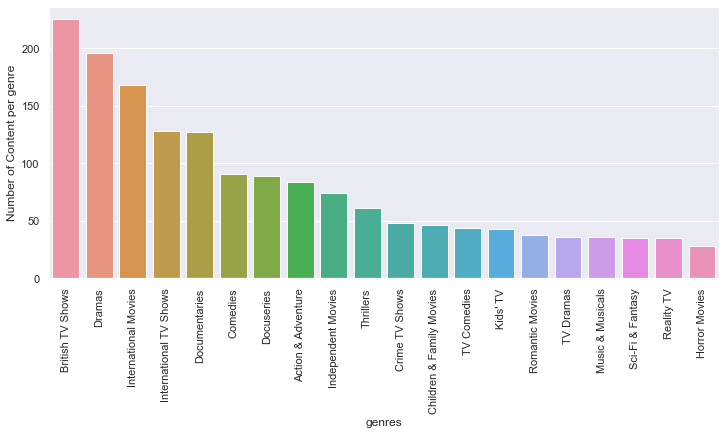

In [396]:
plt.figure(figsize=(12,5))
sns.barplot(x = UK.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20).index ,
            y = UK.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per genre")

plt.show()


### Top 10 Actors in UK

In [397]:
UK.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:]


actors
David Attenborough      17
John Cleese             16
Michael Palin           14
Terry Jones             12
Eric Idle               12
Terry Gilliam           11
Graham Chapman          11
Helena Bonham Carter     9
Samuel West              9
Judi Dench               9
Name: title, dtype: int64

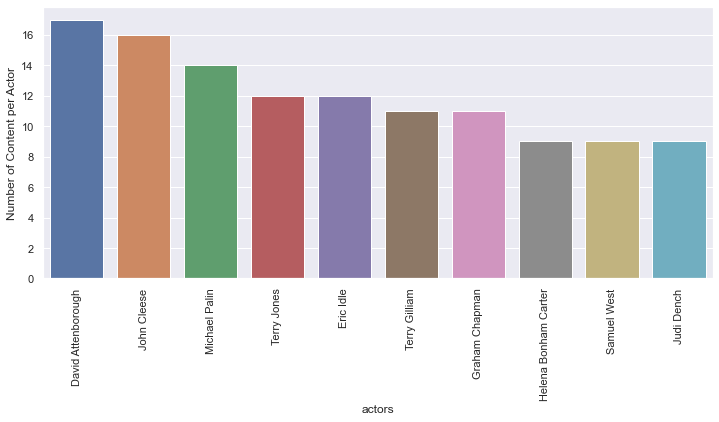

In [398]:
plt.figure(figsize=(12,5))
sns.barplot(x = UK.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = UK.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per Actor")
plt.show()

### Top 5 directors in UK

In [317]:
UK.groupby("directors")["title"].nunique().sort_values(ascending=False).head(10)[1:]


directors
Edward Cotterill       4
Alastair Fothergill    4
Jerry Rothwell         3
Martin Campbell        3
Blair Simmons          3
Vince Marcello         3
Tom Hooper             3
Terry Gilliam          3
Steven C. Miller       2
Name: title, dtype: int64

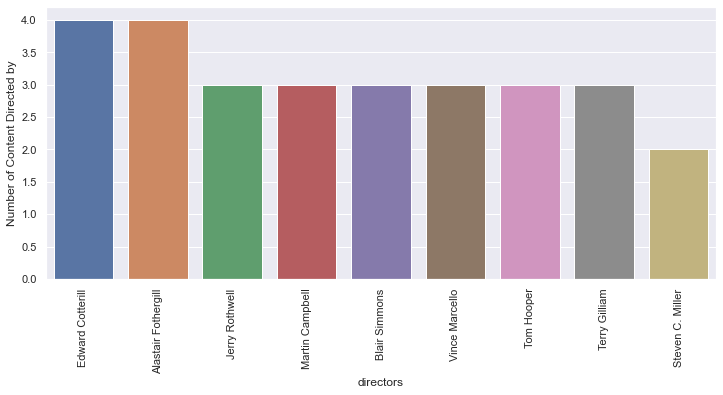

In [399]:

plt.figure(figsize=(12,5))
sns.barplot(x = UK.groupby("directors")["title"].nunique().sort_values(ascending=False).head(10)[1:].index ,
            y = UK.groupby("directors")["title"].nunique().sort_values(ascending=False).head(10)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content Directed by")


plt.show()




##### TV shows in UK

In [400]:
UK = data.loc[data["countries"] == "United Kingdom"]
UK.shape

(12945, 18)

In [401]:
UK.groupby("type")["title"].nunique()

type
Movie      532
TV Show    272
Name: title, dtype: int64

<AxesSubplot: xlabel='type', ylabel='title'>

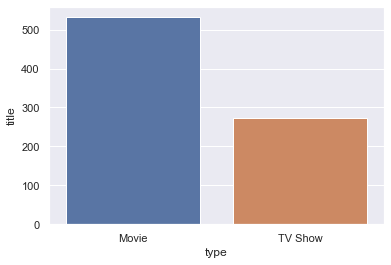

In [402]:
sns.barplot(x = UK.groupby("type")["title"].nunique().index , 
           y = UK.groupby("type")["title"].nunique())

In [403]:
UK_TV_shows = UK.loc[UK["type"]=="TV Show"]


In [404]:
UK_TV_shows = UK_TV_shows.groupby(["title","year_added"]).nunique().reset_index()

In [405]:
UK_TV_shows = UK_TV_shows[["title","year_added"]].sort_values(by="year_added")

In [406]:
UK_TV_shows=  UK_TV_shows.groupby("year_added").nunique()
UK_TV_shows

,title
year_added,
2013,1
2015,5
2016,22
2017,53
2018,44
2019,60
2020,49
2021,37


##### Trend line for TV Shows in UK

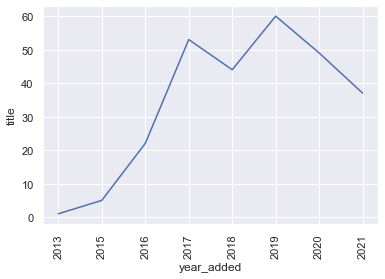

In [407]:
sns.lineplot(x = UK_TV_shows.index,
           y = UK_TV_shows["title"])
plt.xticks(rotation = 90)
plt.show()

In [408]:
UK_TV_shows = UK.loc[UK["type"]=="TV Show"]
UK_TV_shows.shape

(4385, 18)

In [409]:
UK_TV_shows.groupby("directors")["title"].nunique().sort_values(ascending=False)[1:].head(10)

directors
Alastair Fothergill    3
Tony Collingwood       1
Toby Haynes            1
Simon Frederick        1
Rachel Bell            1
Philippa Lowthorpe     1
Noam Murro             1
Michael Samuels        1
Michael Cumming        1
Mark Tonderai          1
Name: title, dtype: int64

In [410]:
UK_TV_shows.groupby("actors")["title"].nunique().sort_values(ascending=False).head(10)[1:]

actors
David Attenborough    13
Terry Jones            5
Graham Chapman         5
John Cleese            5
Eric Idle              5
Michael Palin          5
Terry Gilliam          4
Teresa Gallagher       4
Harriet Walter         4
Name: title, dtype: int64

In [331]:
UK_TV_shows.groupby("genres")["title"].nunique().sort_values(ascending=False).head(10)

genres
British TV Shows          225
International TV Shows    128
Docuseries                 89
Crime TV Shows             48
TV Comedies                44
Kids' TV                   43
TV Dramas                  36
Reality TV                 35
Science & Nature TV        27
Romantic TV Shows          11
Name: title, dtype: int64

# For canada

In [411]:
Canada = data.loc[data["countries"] == "Canada"]
Canada.head()


,title,actors,directors,countries,genres,type,date_added,release_year,rating,duration,year_added,month_added,day_added,Content_For,Movie_duration,Series_duration,Movie_length,Series_length
937,Birth of the Dragon,Billy Magnussen,George Nolfi,Canada,Action & Adventure,Movie,2021-09-16,2017,PG-13,96 min,2021,Sep,Thu,Teens,96.0,NaN,medium,NaN
938,Birth of the Dragon,Billy Magnussen,George Nolfi,Canada,Dramas,Movie,2021-09-16,2017,PG-13,96 min,2021,Sep,Thu,Teens,96.0,NaN,medium,NaN
943,Birth of the Dragon,Ron Yuan,George Nolfi,Canada,Action & Adventure,Movie,2021-09-16,2017,PG-13,96 min,2021,Sep,Thu,Teens,96.0,NaN,medium,NaN
944,Birth of the Dragon,Ron Yuan,George Nolfi,Canada,Dramas,Movie,2021-09-16,2017,PG-13,96 min,2021,Sep,Thu,Teens,96.0,NaN,medium,NaN
949,Birth of the Dragon,Qu Jingjing,George Nolfi,Canada,Action & Adventure,Movie,2021-09-16,2017,PG-13,96 min,2021,Sep,Thu,Teens,96.0,NaN,medium,NaN


In [412]:
Canada.shape


(7915, 18)

### top 20 genres in Canada 

In [413]:

Canada.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20)


genres
Comedies                    94
Dramas                      82
Children & Family Movies    80
Kids' TV                    61
International Movies        60
Thrillers                   49
Independent Movies          44
Action & Adventure          44
Documentaries               42
Horror Movies               36
TV Dramas                   32
TV Comedies                 30
Sci-Fi & Fantasy            28
International TV Shows      25
Romantic Movies             25
Crime TV Shows              15
Music & Musicals            14
Sports Movies               13
TV Action & Adventure       12
Docuseries                  11
Name: title, dtype: int64

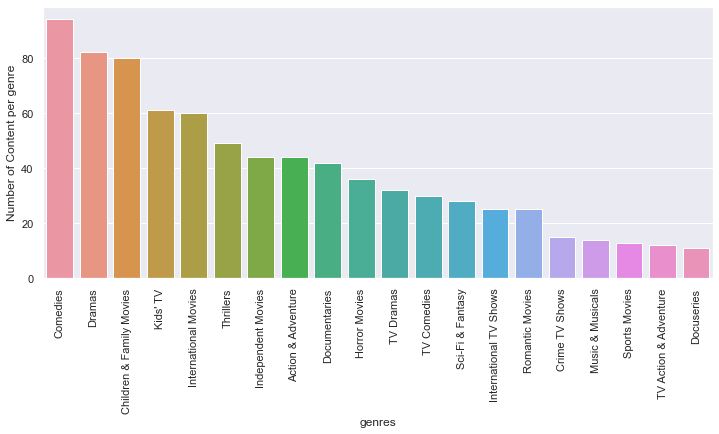

In [414]:


plt.figure(figsize=(12,5))
sns.barplot(x = Canada.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20).index ,
            y = Canada.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per genre")

plt.show()





### Top 10 Actors in Canada

In [415]:



Canada.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:]




actors
John Paul Tremblay    14
Robb Wells            14
John Dunsworth        12
Vincent Tong          12
Ashleigh Ball         12
Andrea Libman         11
Michela Luci          11
Mike Smith            10
Tara Strong            9
Cory Doran             9
Name: title, dtype: int64

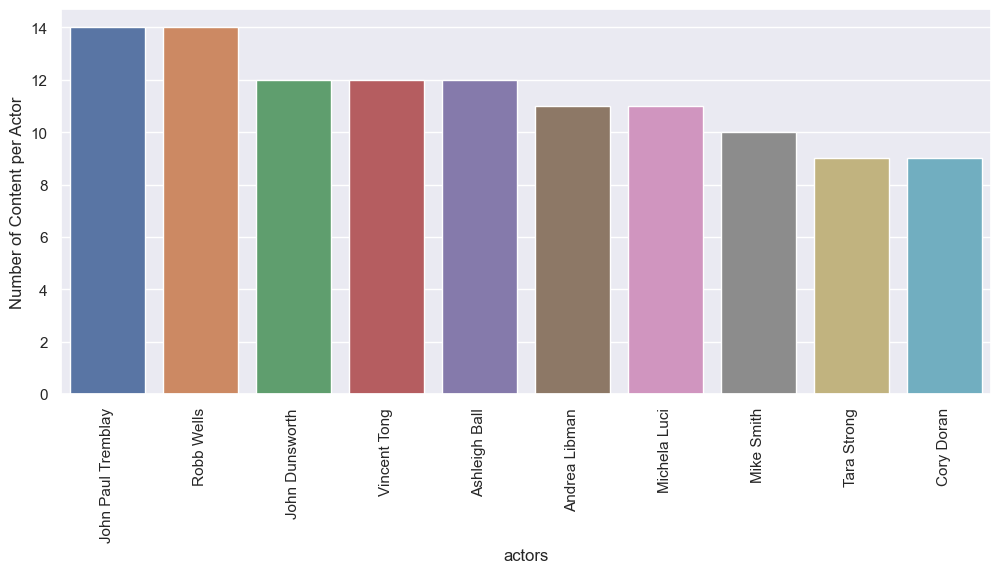

In [177]:
plt.figure(figsize=(12,5))
sns.barplot(x = Canada.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = Canada.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per Actor")
plt.show()






### Top 10 directors in Canada


In [416]:


Canada.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)[1:]


directors
Justin G. Dyck        8
Mike Clattenburg      5
Mike Smith            5
John Paul Tremblay    5
Name: title, dtype: int64

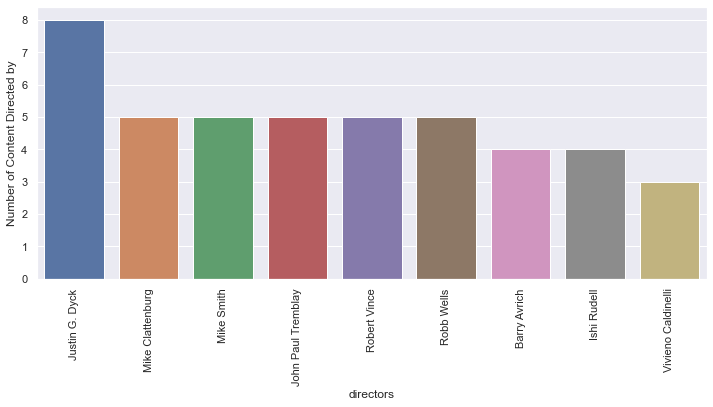

In [417]:

plt.figure(figsize=(12,5))
sns.barplot(x = Canada.groupby("directors")["title"].nunique().sort_values(ascending=False).head(10)[1:].index ,
            y = Canada.groupby("directors")["title"].nunique().sort_values(ascending=False).head(10)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content Directed by")


plt.show()




# Apart from Highest Subscribers Countries : 
## people from other countries can be potentials subscribers : 
### Those countries are : 

Russia                
China                 
Germany               
South Korea
Mexico                
Singapore             
Poland                
United Arab Emirates  
        



## recommended actors/directors and genres in countires listed above are analysed below : 

In [419]:
potential_subscribers_from = ["Russia","China","Germany","South Korea", "Mexico","Singapore","Poland","United Arab Emirates"]

In [420]:
for countries in potential_subscribers_from:
    print("===============================================")
    print("Country: ",countries)
    print("Recommended Names # Number of movies they have done")
    print("-----------------------------------------------")
    print(data[data["countries"]==countries].groupby("actors")["title"].nunique().sort_values(ascending = False).head(10))
    print("-----------------------------------------------")
    print(data[data["countries"]==countries].groupby("directors")["title"].nunique().sort_values(ascending = False).head(6)[1:])
    print("-----------------------------------------------")
    print(data[data["countries"]==countries].groupby("genres")["title"].nunique().sort_values(ascending = False).head(10))
    print()

Country:  Russia
Recommended Names # Number of movies they have done
-----------------------------------------------
actors
Unknown                   5
Alexander Petrov          3
Paulina Andreeva          3
Eldar Kalimulin           2
Olga Sutulova             2
Fillip Gorenshtein        2
Alyson Leigh Rosenfeld    2
Erica Schroeder           2
Dmitry Shevchenko         2
Kirill Käro               2
Name: title, dtype: int64
-----------------------------------------------
directors
Aleksey German       1
Aleksey Tsitsilin    1
Chris Gorak          1
Gayane Petrosyan     1
Ilya Naishuller      1
Name: title, dtype: int64
-----------------------------------------------
genres
International TV Shows      10
TV Dramas                    7
Kids' TV                     6
International Movies         6
Crime TV Shows               6
Action & Adventure           4
Dramas                       3
Documentaries                2
Children & Family Movies     2
Sci-Fi & Fantasy             2
Name: 

## Conclusions:

### 1. About 70% content available are Movies and rest 30% are TV shows

### 2. Rating distribution shows, most of the content is for Adults followed by Teens(13+), OlderKids(5+), and kids(2-4).

### 3. Only 2% content is rated for All ages.
### 4. Content Released over years have increasing trend, till 2018, then gradually decreasing, may be due to pandemic hit. 

### 5. Most of the content added is during summer and winter holidays (July, dec)
### 6. Most contents are added on Fridays.

### 7. Most popular genres produced are International Movies/TV shows, Dramas, Comedies, Documentaries ,Action & Adventure and Children & family movies.

### 8. Prominent Genres in Countries like India are Drama and  International Movies, however, in USA  Dramas, Documentaries and comedies are more popular.

### 9. Actors like Anupam Kher and Shah Rukh Khan were among the top content producers globally.

### 10. Most productive directors are Rajiv Chilaka, Jan Suter and Raul Campos globally.

### 11. US is the top content producer followed by India, UK, Canada , France, Japan respectively.

### 12. It is observed that about 87% of content produced by just 20 countries.

### 13. Movies length (~ 1.5 hr) is almost similar over the last few years with some exceptions, however, Series were of 1-3 season with some  exceptions  to multiple seasons 

### 14. United Kingdom, Japan, South Korea, Taiwan, Australia, China, Combodia , Singapore : has more tv shows content compare to movies

### 15. India, USA, Egypt, Nigeria has more content of Movies compare to TV shows , and for rest of the countries it is equally distributed.

### 16. Analysed most famous TV shows, Movies, Actors, directors, generes  for countries  like India, USA, UK, Canada etc.


# Recomendations

#### 1. We can recommend to focus more on TV shows than Movies in countries where TV shows are more populars and vice-versa.

#### 2. Since the overall trendline of TV shows is increasing in India ! Netflix should focus also on producing more TV series with movies !

#### 3. Since Most Popular Genre in India is International Movies, it it also suggested to add some international TV shows from USA and UK in NetflixIndia.

#### 4. looks like majority of the Movie content is around 75 to 125 min long, however, Series/TV Shows are 1 to 3 seasons long. Netfilx should focus more on Movies and Series with medium length.